# Salifort Motors: Suggestions for HR

The goal of this project is to build predictive models that can provide insights to Human Resources (HR) of Salifort Motors.

Problem:
* Salifort Motors want to improve high turnover rate problem, because it is time-consuming and expensive to find, interview, and hire new employees.
  
The question to answer:
* What's likely to make the employee leave the company?
  
The task to do:
* Build a model that predicts whether or not an employee will leave the company.

> <span style = 'color:red'>***Note: Since there are so many plots and their complexity and variety, they have been reinterpreted many times, so you will notice that sometimes information from later plots is mentioned in earlier plots to make the picture clearer. So if possible, please check all the plots yourself once and come back to read my interpretation to avoid confusion.*** </span>

***AI are involved in this analysis as a assistant***


In [1]:
# Import packages

# Data manipulation packages
import pandas as pd
import numpy as np
import warnings as wn

# Modeling packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,f1_score, precision_score, accuracy_score, recall_score, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import data file
df0 = pd.read_csv("../input/HR_comma_sep.csv")

# EDA

In [3]:
# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

Generally, data that needed are sufficient, all columns are valuable, easy to understand and relate with the goal of this project. But, there are some concern on satisfaction level because the score only might not reflect all the truth.

The performance last evaluation and classification of salary are high, medium, and low seemingly valid, but like satisfaction level. They are still lack of context which valuable and give more understanding when combined with only dataset itself.

First, we need to clean and prepare data for visualization and modeling to see what data want to tell us properly.

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Data Cleaning

In [6]:
# There are some columns that need to be changed follow the practices

# Rename columns 
df0 = df0.rename(columns={'Work_accident': 'work_accident','Department':'department','average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  work_accident  left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                     127                   3              0     1   
1368                     132                   3              0     1   
1461                     142                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [10]:
# Drop duplicates and save resulting dataframe in a new variable
data_subset = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
data_subset.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [11]:
# Check if there are some booleans which are not included in outlier checking
# Actually we also can inspect this with '.describe', the results must be 0 and 1 only

print(data_subset['work_accident'].unique())
print(data_subset['left'].unique())
print(data_subset['promotion_last_5years'].unique())

[0 1]
[1 0]
[0 1]


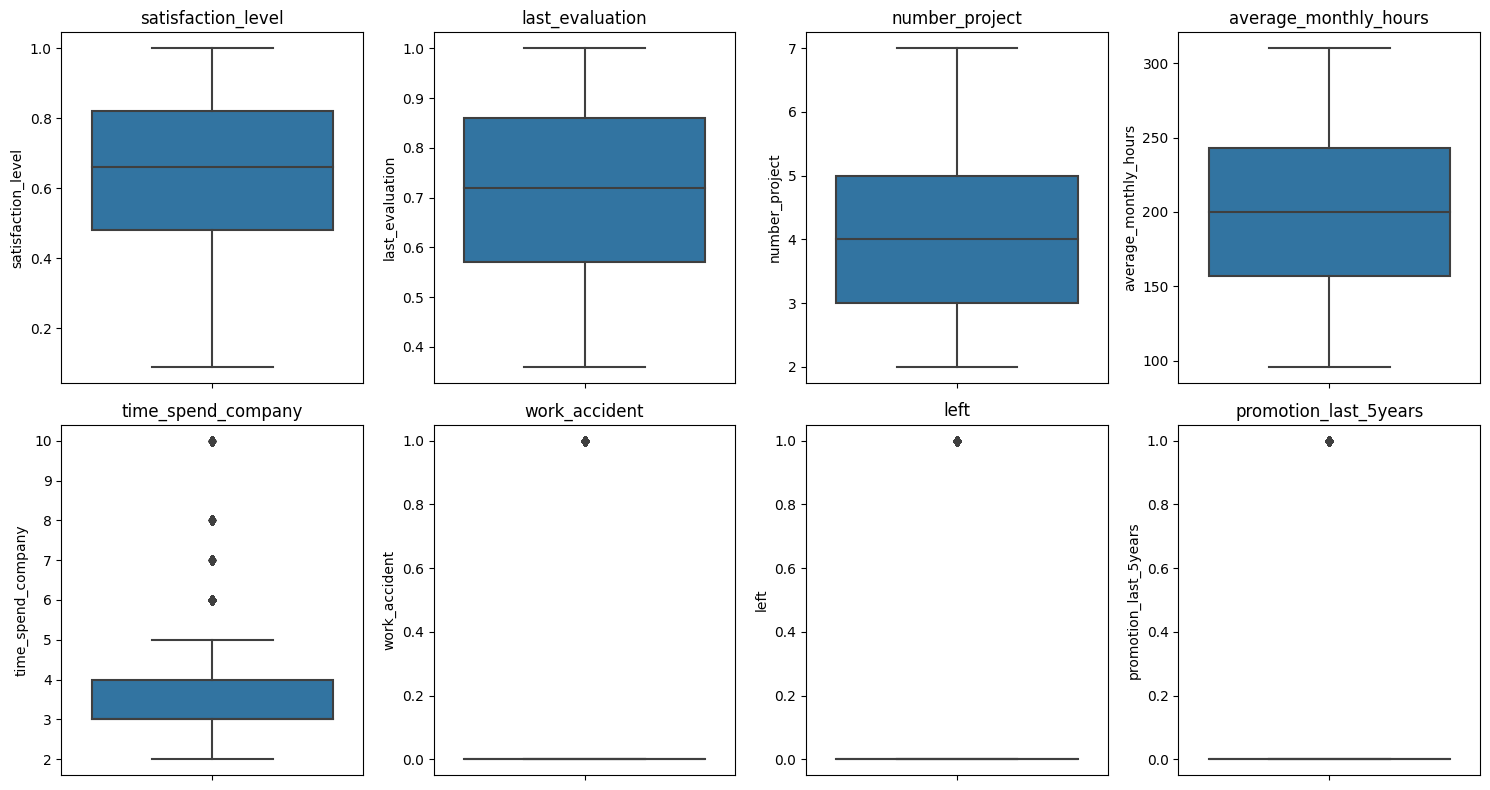

In [12]:

# Create boxplots to detect any outliers

# Define columns_to_plot to use in loop
columns_to_plot = data_subset 

# Create 2 rows, 4 columns
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  

# '.flatten()' used to convert a multi-dimensional array into a one-dimensional array.
for ax, col in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(y=data_subset[col], ax=ax)
    ax.set_title(col)

# Adjust spacing
plt.tight_layout()  


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Raw boxplot itself did not give much information but very useful to inspect outlier.
Plots above suggest that are only extreme outlier on time_spend_company. 

In [13]:
# Determine the number of rows containing outliers

Q1 = data_subset['time_spend_company'].quantile(0.25)
Q3 = data_subset['time_spend_company'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

data_filtered = data_subset[
    (data_subset['time_spend_company'] >= lower_bound) &
    (data_subset['time_spend_company'] <= upper_bound)
]

#To count the number of rows removed.
outliers_removed = len(data_subset) - len(data_filtered)
print(f"Number of rows removed due to outliers: {outliers_removed}")

Number of rows removed due to outliers: 824


There are 824 rows of outliers, so I decide to remove them because they are acceptable amount to remove compare to the whole dataset and prevent skewed analysis and model is important, a few data we removed should not effect the result of modeling in bad way.

In [14]:
# To check the target class imbalance

# Get numbers of people who left vs. stayed
print(data_filtered['left'].value_counts())

# Get percentages of people who left vs. stayed
print(data_filtered['left'].value_counts(normalize = True)*100)

left
0    9285
1    1882
Name: count, dtype: int64
left
0    83.146772
1    16.853228
Name: proportion, dtype: float64


As you can see data are quite imbalance. If it's portion  is about 80 - 20, it is acceptable, in this case there are 83 - 17. However, XGBoost is robust with imbalance data. Then I decided to try different versions of them.

In [15]:
data_filtered.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Data Upsampling

In [16]:
# Prepare data upsampled for model comparing
X2 = data_filtered.drop(columns=['left'])
y2 = data_filtered['left']

In [17]:
# Split data into 80 and 20 portion
X_tr2, X_test2, y_tr2, y_test2 = train_test_split(X2,y2, test_size = 0.2,stratify = y2,random_state = 0)

In [18]:
# Split data into 60,20 and 20 portion
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_tr2,y_tr2, test_size = 0.25, stratify = y_tr2, random_state = 0)

In [19]:
# Define 'majority data' and 'minority data'
data_train = X_train2.copy()
data_train['left'] = y_train2
data_minority = data_train[data_train['left'] == 1]
data_majority = data_train[data_train['left'] == 0]

In [20]:
# Use 'resample' to upsample data minority
data_minority_upsampled = resample(data_minority, 
                           replace =True,
                          n_samples=len(data_majority),random_state = 0)

In [21]:
# Combine 'data minority' with 'data majority' into data_upsampled
data_upsampled  =pd.concat([data_majority,data_minority_upsampled]).reset_index(drop = True)

In [22]:
# See is 'data_upsampled' combined correctly
data_upsampled.describe()

satisfaction_level  last_evaluation  number_project  \
count        11140.000000     11140.000000    11140.000000   
mean             0.547864         0.710447        3.776212   
std              0.264914         0.179882        1.476606   
min              0.090000         0.360000        2.000000   
25%              0.380000         0.540000        2.000000   
50%              0.540000         0.720000        4.000000   
75%              0.780000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  work_accident  \
count           11140.000000        11140.000000   11140.000000   
mean              202.012747            3.360503       0.107630   
std                54.474947            0.931452       0.309927   
min                96.000000            2.000000       0.000000   
25%               151.000000            3.000000       0.000000   
50%               199.000000            3.000000       0.000000   
75%               252.000000            4.000000       0.000000   
max               310.000000            5.000000       1.000000   

       promotion_last_5years          left  
count           11140.000000  11140.000000  
mean                0.010054      0.500000  
std                 0.099768      0.500022  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.500000  
75%                 0.000000      1.000000  
max                 1.000000      1.000000

In [23]:
# Define y_train as a target class
y_train2 = data_upsampled['left']

#Drop y_train
X_train2 = data_upsampled.drop(columns=['left'])

In [24]:
# Change categorical variables to numerical using 'get_dummies' on necessary sets
X_train2 = pd.get_dummies(X_train2, columns=['department', 'salary'], drop_first=True)
X_val2 = pd.get_dummies(X_val2, columns=['department', 'salary'], drop_first=True)
X_test2 = pd.get_dummies(X_test2, columns=['department', 'salary'], drop_first=True)

In [25]:
#Check if data was splitted properly
X_tr2.shape,X_train2.shape,X_val2.shape,X_test2.shape,y_tr2.shape,y_train2.shape,y_val2.shape,y_test2.shape

((8933, 9),
 (11140, 18),
 (2234, 18),
 (2234, 18),
 (8933,),
 (11140,),
 (2234,),
 (2234,))

In [26]:
# Check if target class are upsampled
y_train2.value_counts()

left
0    5570
1    5570
Name: count, dtype: int64

# Visualization

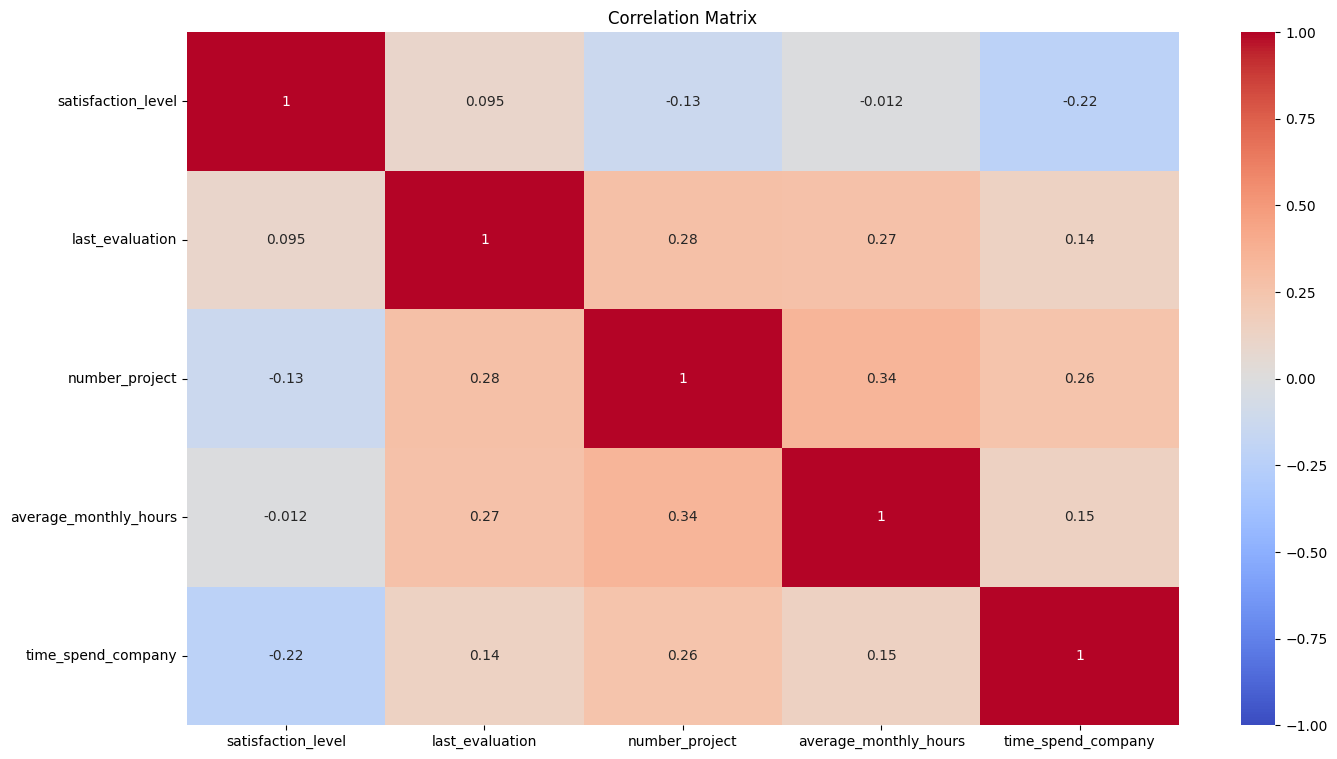

In [27]:
#Plot heatmap to see correlation between variables
plt.figure(figsize=(16,9))
corr = data_filtered[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',vmin=-1, vmax=1 )
plt.title('Correlation Matrix')
plt.show()

there are no correlation between variables

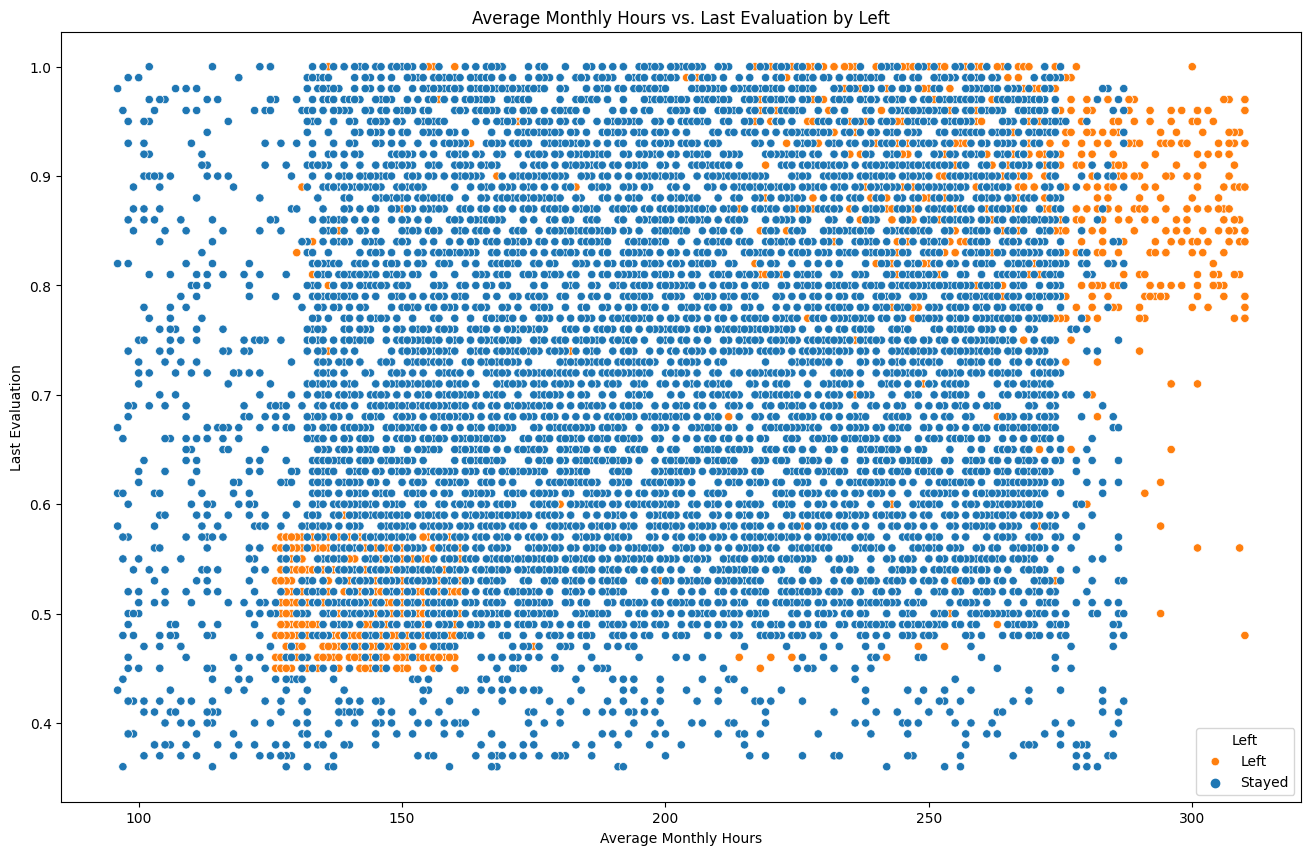

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=data_filtered, x='average_monthly_hours',y='last_evaluation', hue='left')
plt.title('Average Monthly Hours vs. Last Evaluation by Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.legend(title='Left', labels=['Left', 'Stayed'])

From the plot most of people who left company are work between about 125 - 160 hours with 0.45 - 0.58 evaluation score  and 220 - 310 hours per month with 0.8 - 1 evaluation score

It is indicate that in the left group, if people work less hours, the evaluation score will also less. In the other hand it could be vice versa situation while high evaluation lead to high work hours.

Text(0, 0.5, 'Last Evaluation')

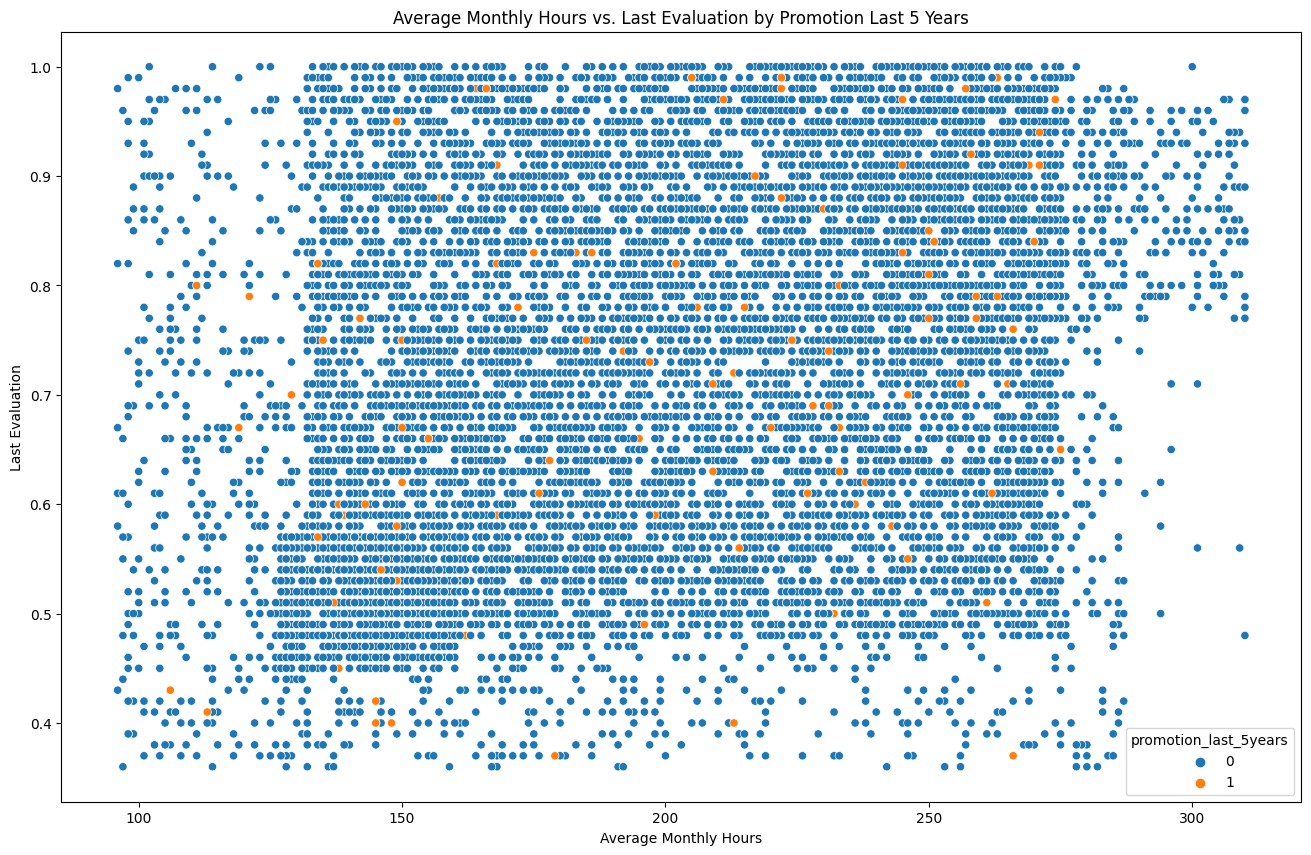

In [29]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=data_filtered, x='average_monthly_hours',y='last_evaluation', hue='promotion_last_5years')
plt.title('Average Monthly Hours vs. Last Evaluation by Promotion Last 5 Years')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')

There are no specific trend between Average Monthly Hours and Last Evaluation on left

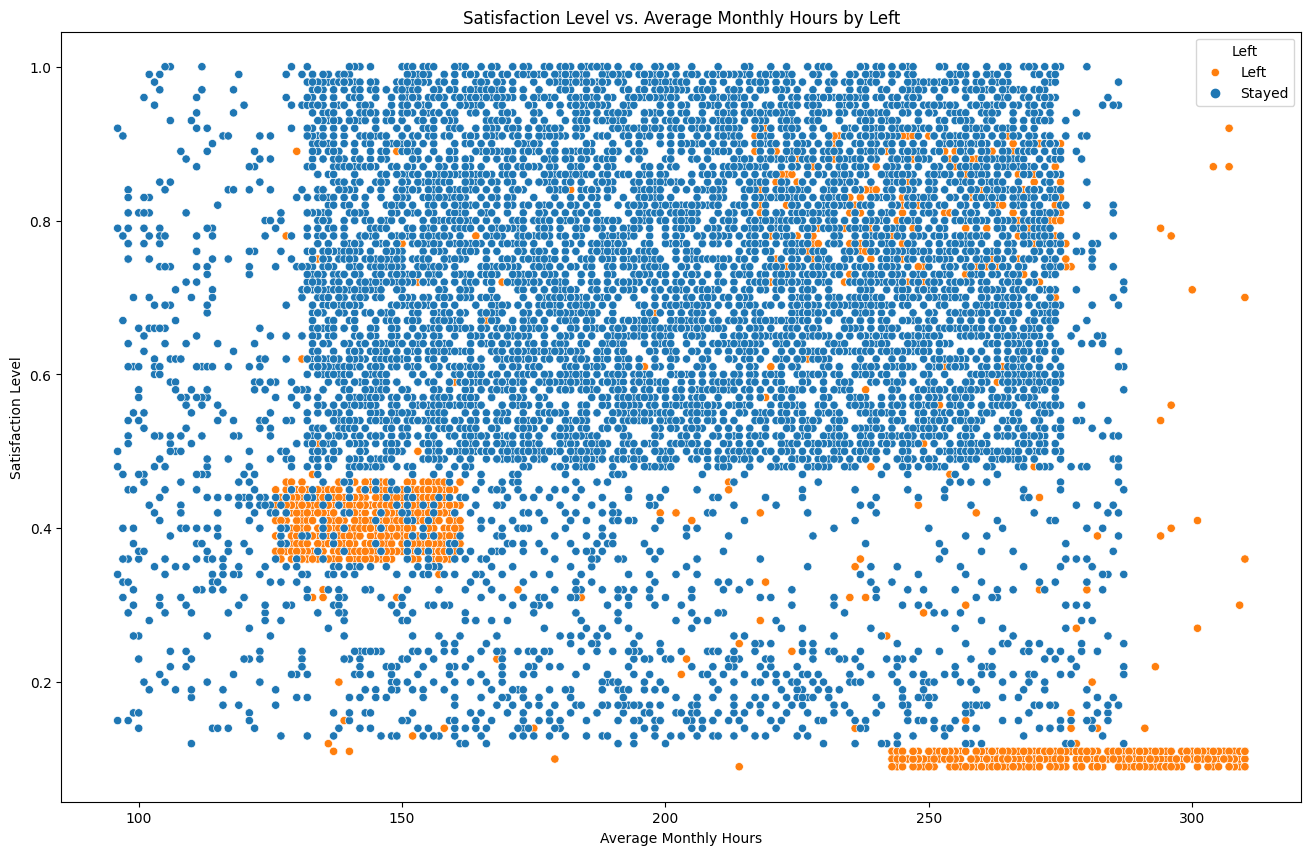

In [30]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data_filtered, y='satisfaction_level',x='average_monthly_hours',hue='left')
plt.title('Satisfaction Level vs. Average Monthly Hours by Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', labels=['Left', 'Stayed'])

The groups of people that have satisfaction level between 0.35 - 0.45 with 125 - 160 average monthly hours could be the same group with 'Average Monthly Hours vs. Last Evaluation by Left' plot which is lower performance group with lower working hours. 

Another group is people who work between 240 - 320 hours with almost 0 satisfaction level also likely to be the high performance group with high working hours. 

There is still one more group that is has 0.7 - 0.9 satisfaction level which is high with average monthly hours between 210 - 275 hours.

So, we can assume that there are more than a factor that influence employees to leave.

Text(0, 0.5, 'Satisfaction Level')

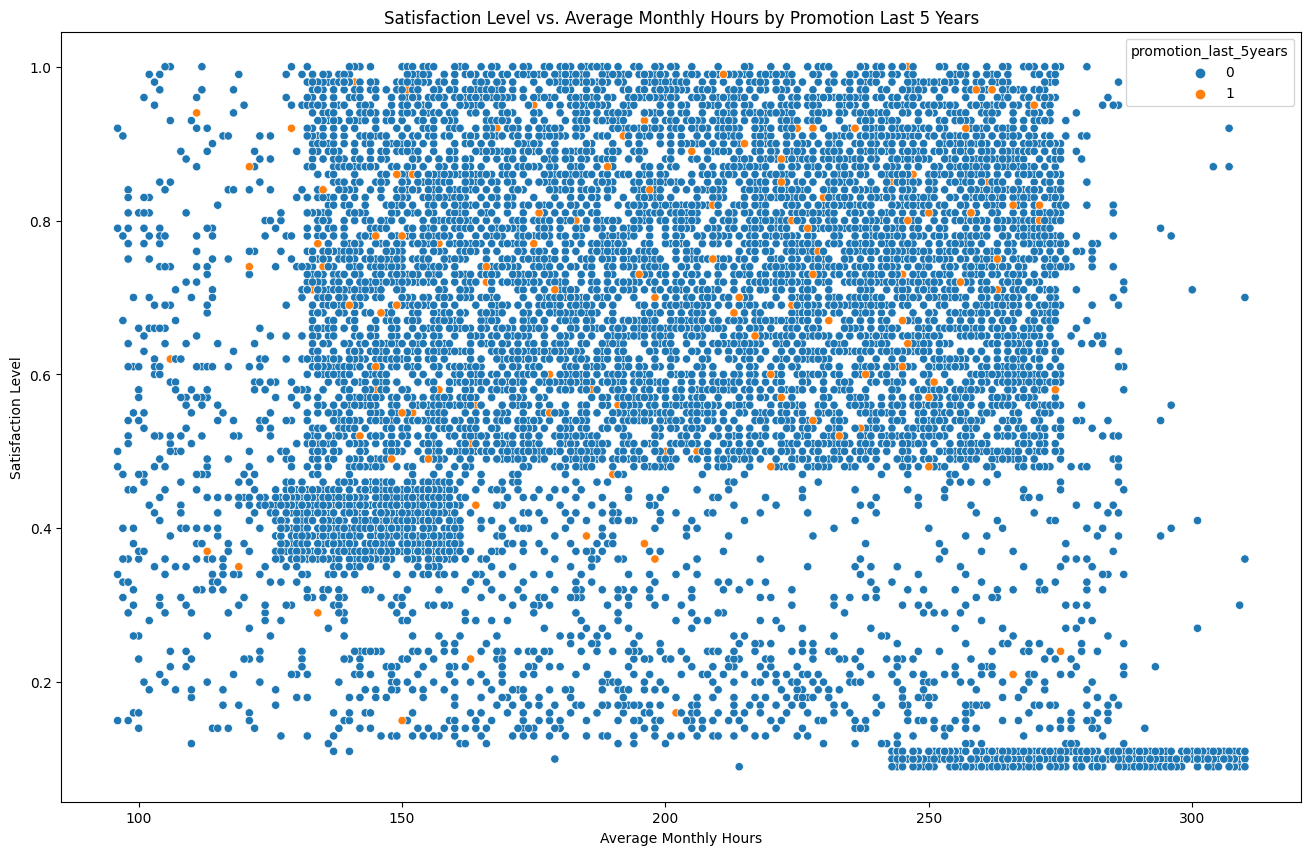

In [31]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data_filtered, y='satisfaction_level',x='average_monthly_hours',hue='promotion_last_5years')
plt.title('Satisfaction Level vs. Average Monthly Hours by Promotion Last 5 Years')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

There are no specific trend between Average Monthly Hours and Satisfaction Level on left

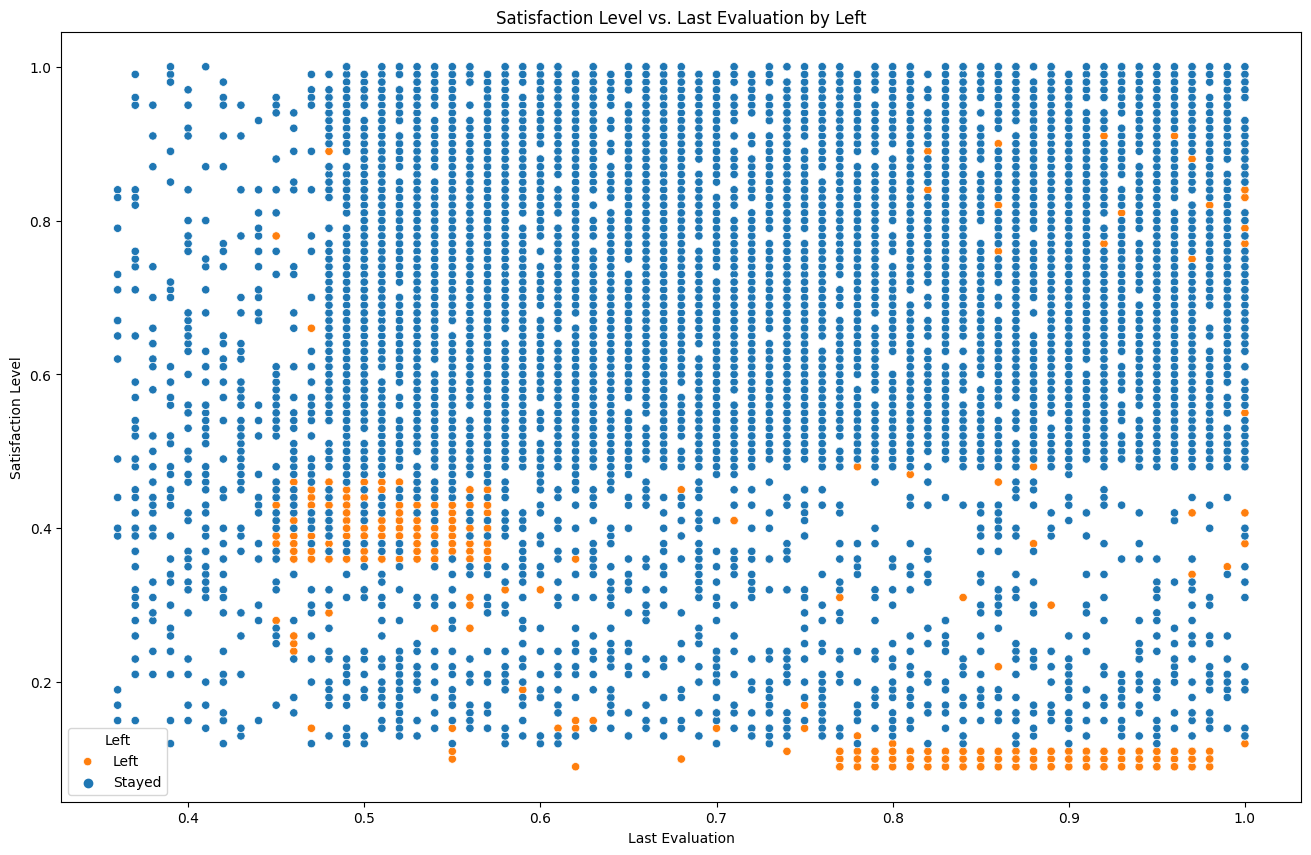

In [32]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data_filtered, y='satisfaction_level',x='last_evaluation',hue='left')
plt.title('Satisfaction Level vs. Last Evaluation by Left')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', labels=['Left', 'Stayed'])

The plot show similar patterns from the plots above that people who left company has satisfaction score between 0.35 - 0.45 and another group is almost 0 score with 0.78 - 0.98 last evaluation which is high and low performance groups.

If satisfaction score is low, whether employees' evaluation score is high or low they still leave.

Text(0, 0.5, 'Satisfaction Level')

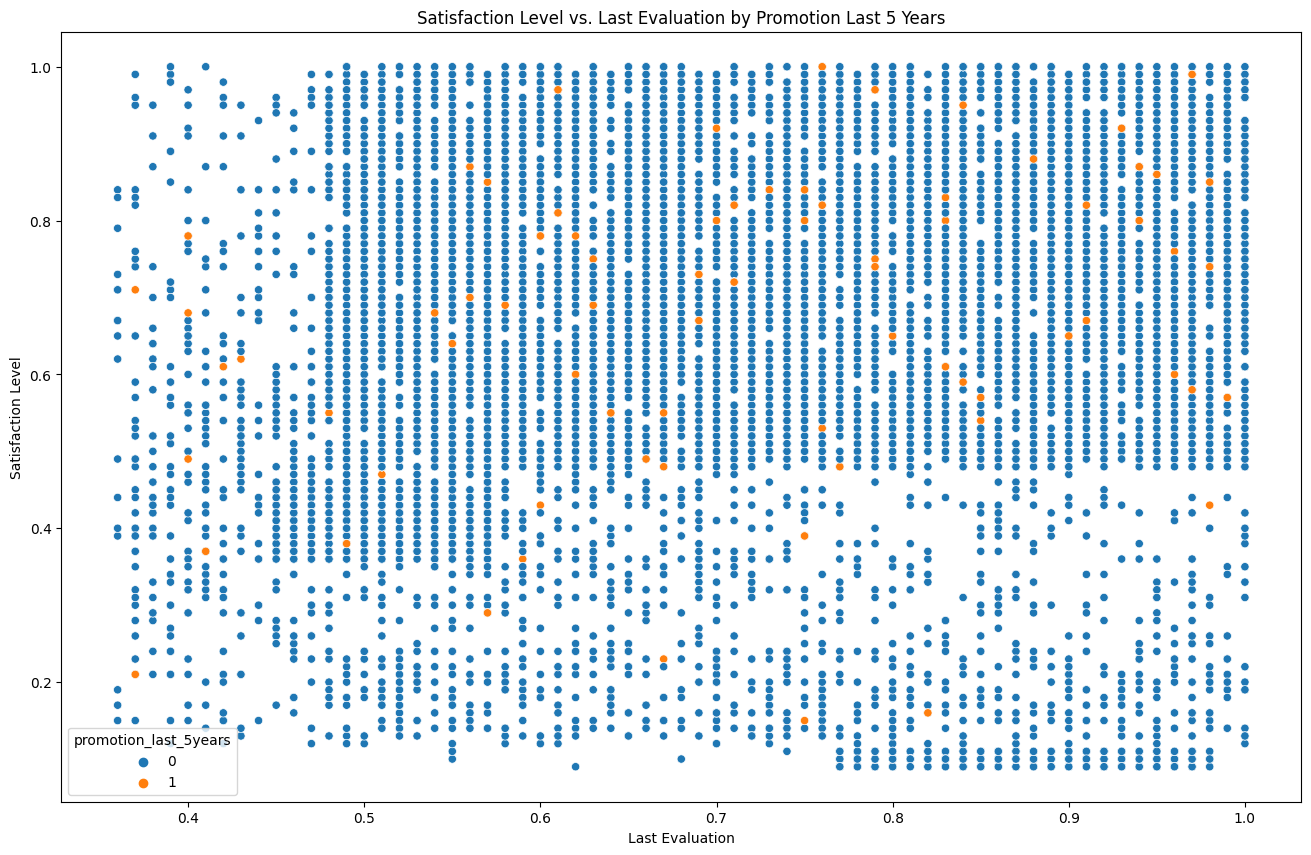

In [33]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=data_filtered, y='satisfaction_level',x='last_evaluation',hue='promotion_last_5years')
plt.title('Satisfaction Level vs. Last Evaluation by Promotion Last 5 Years')
plt.xlabel('Last Evaluation')
plt.ylabel('Satisfaction Level')

There are no specific trend between Satisfaction Level and Last Evaluation on left

Text(0.5, 0, 'Departments')

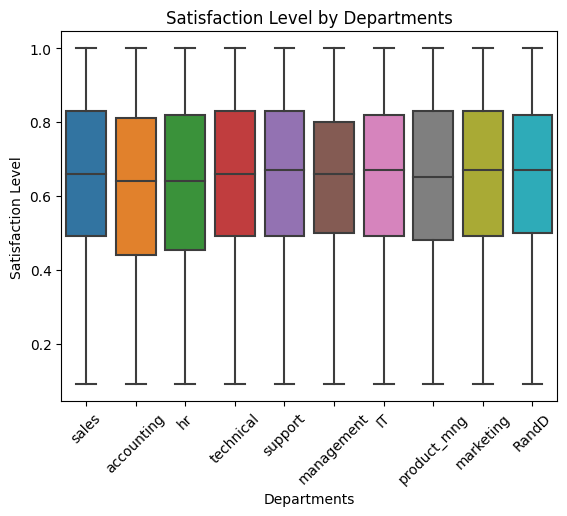

In [34]:
sns.boxplot(data = data_filtered, y='satisfaction_level',x='department')
plt.xticks(rotation = 45)
plt.title('Satisfaction Level by Departments')
plt.ylabel('Satisfaction Level')
plt.xlabel('Departments')

Satisfaction level from every departments are almost the same level of median and overall satisfaction level.

Satisfaction level by departments

Sales : ~ 0.5 - 0.82 with ~ 0.67 median

Accounting :~ 0.45 - 0.8 with ~ 0.64 median

HR : ~ 0.47 - 0.81 with ~ 0.64 median

Technical : ~ 0.5 - 0.82  with ~ 0.67 median

Suport : ~ 0.5 - 0.82 with ~ 0.68 median

manamgent : ~ 0.51 - 0.78 with ~ 0.67 median

IT : ~0.5 - 0.81 with ~ 0.68 median

product_mng : ~ 0.49 - 0.82 with ~ 0.64 median

marketing : ~0.5 - 0.82 with ~ 0.68 median

R&D : ~0.51 - 0.81 with ~ 0.68 median

Text(0, 0.5, 'Last Evaluation')

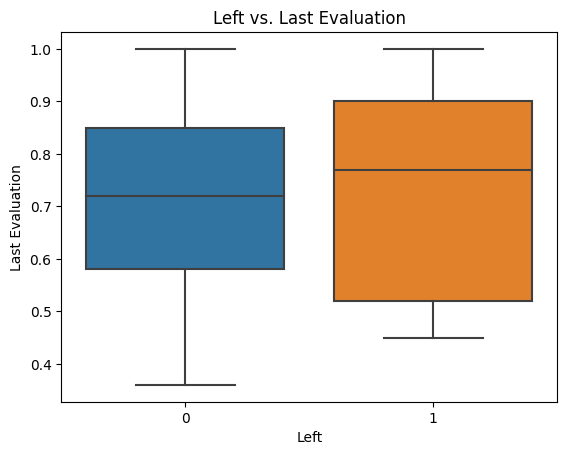

In [35]:
sns.boxplot(x='left', y='last_evaluation', data=data_filtered)
plt.title('Left vs. Last Evaluation')
plt.xlabel('Left')
plt.ylabel('Last Evaluation')

Evaluation score range of leaver are wider compare to stay group, this support the previous plot about evaluation score that employees who left are high and low performance groups. However, this plot is not tell density of each score then we need a clearer plot.

Stay : ~0.6 - 0.85

Left : ~0.55 - 0.9

Note: Median of people who leave is a little bit higher than stay (around 0.05) then people who leave tend to have better evaluation score.

*Which mean we lost high performance employees.*


Text(0, 0.5, 'Last Evaluation')

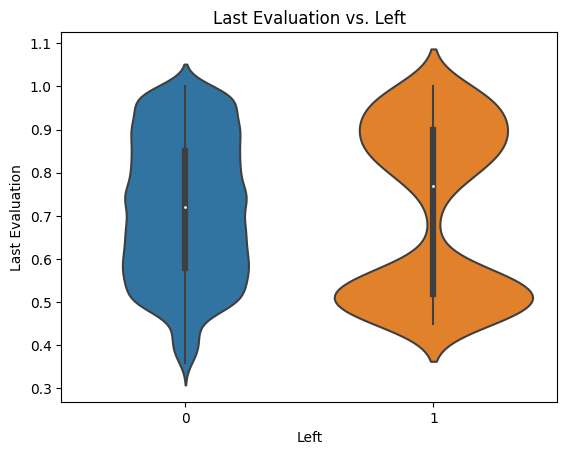

In [36]:
sns.violinplot(data=data_filtered, y='last_evaluation', x='left')
plt.title('Last Evaluation vs. Left')
plt.xlabel('Left')
plt.ylabel('Last Evaluation')

As we expect, distribution of Last evaluation of people who stay are equally portion across every score.

But people who left are in 
* high performance (~ 1.0 - 0.8) and low performance (~ 0.6 - 0.4 )

  
but people in the middle range (~0.6 - 0.8) is more likely to stay.

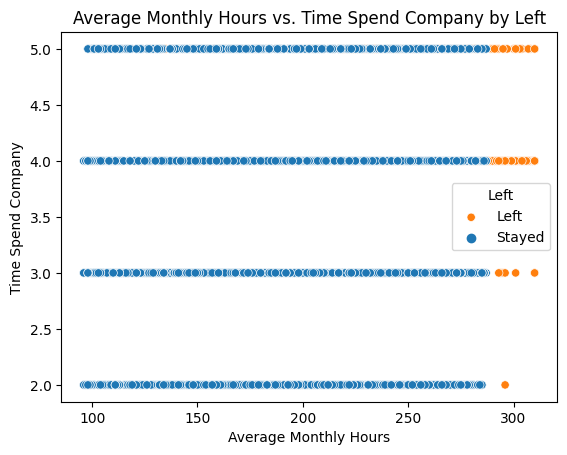

In [37]:
sns.scatterplot(data_filtered, x='average_monthly_hours', y='time_spend_company', hue='left')
plt.title('Average Monthly Hours vs. Time Spend Company by Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Time Spend Company')
plt.legend(title='Left', labels=['Left', 'Stayed'])

Plot show that employees are tend to leave if work hours close to 300 hours per month and more likely to leave if work for 4 - 5 years.

Text(0, 0.5, 'Count')

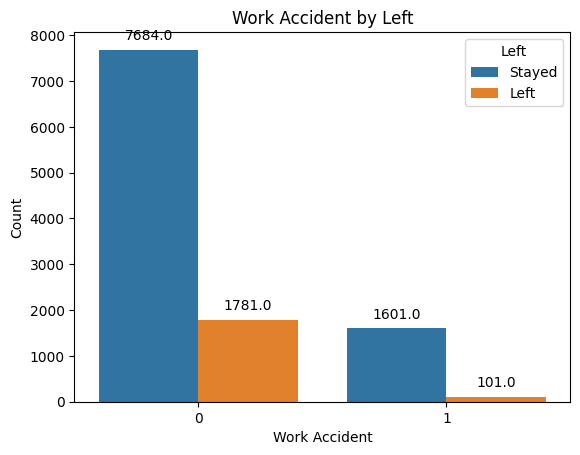

In [38]:
ax = sns.countplot(data_filtered, x='work_accident', hue ='left')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Work Accident by Left')
plt.legend(title = 'Left', labels=['Stayed','Left'])
plt.xlabel('Work Accident')
plt.ylabel('Count')

In [39]:
print('Never had accident group left portion:',1781/(7684+1781))
print('Had accident group left portion:',101/(1601+101))

Never had accident group left portion: 0.18816693079767566
Had accident group left portion: 0.05934195064629847


The plot above suggest that in had accident group, employees is less portion of left.

Then accident should not be the main reason that influence employees to leave.

However, It might useful to investigate more about work accident to reduce work accident and high turnover rate even it is unlikely to be a main factors. 

Text(0, 0.5, 'Average Monthly Hours')

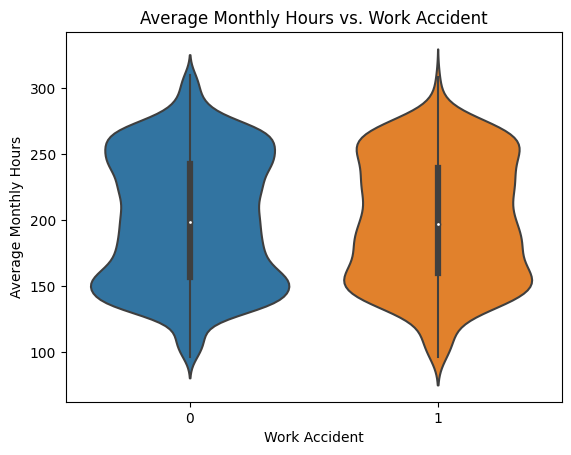

In [40]:
ax = sns.violinplot(data_filtered, y='average_monthly_hours', x='work_accident')
plt.title('Average Monthly Hours vs. Work Accident')
plt.xlabel('Work Accident')
plt.ylabel('Average Monthly Hours')

The plot show that two groups' work hours almost the same , for never had accident group people are work even in winder range, in the other side, people who experienced with accident has more narrow work hours range.

Then it is should not be working hours that influence to cause accident.

Text(0, 0.5, 'Average Monthly Hours')

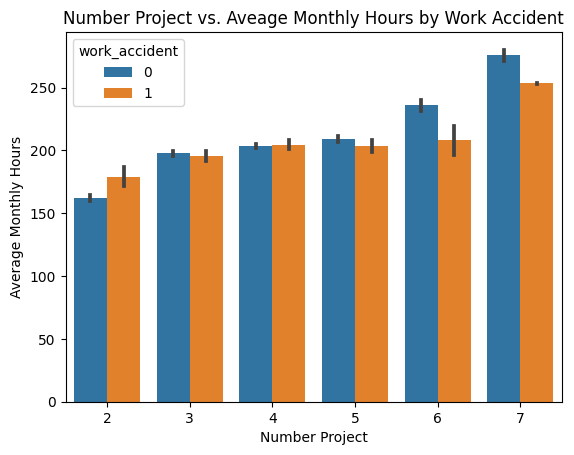

In [41]:
sns.barplot(data_filtered, x='number_project', y='average_monthly_hours', hue='work_accident')
plt.title('Number Project vs. Aveage Monthly Hours by Work Accident')
plt.xlabel('Number Project')
plt.ylabel('Average Monthly Hours')

Plot strongly tell that if the number of project is increased employees will have more average monthly hours and work accident will increase.

Text(0.5, 0, 'Left')

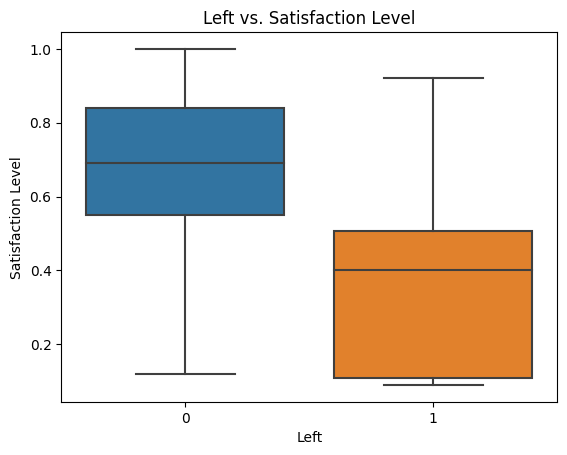

In [42]:
sns.boxplot(x='left', y='satisfaction_level', data=data_filtered)
plt.title('Left vs. Satisfaction Level')
plt.ylabel('Satisfaction Level')
plt.xlabel('Left')

The plot stongly suggest that employees tend to leave if their satisfaction is low

Stay: ~0.6 - 0.8

Left: ~0 - 0.45

Text(0, 0.5, 'Satisfaction Level')

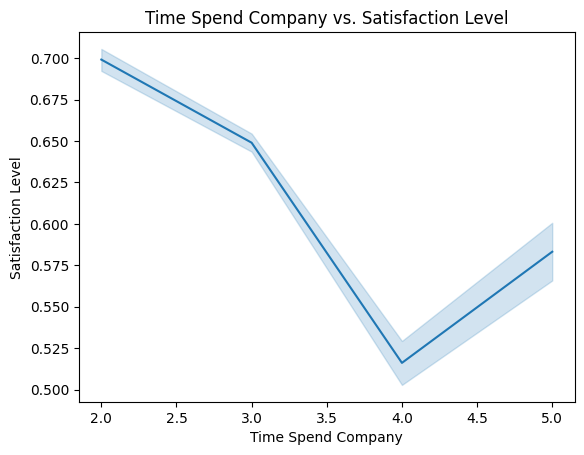

In [43]:
wn.simplefilter(action='ignore', category=FutureWarning)
sns.lineplot(data_filtered,x='time_spend_company',y='satisfaction_level')
plt.title('Time Spend Company vs. Satisfaction Level')
plt.xlabel('Time Spend Company')
plt.ylabel('Satisfaction Level')

Satisfaction level is very high from year 2 then droping to year 3 and dramatically drop in year 4, but start higher at year 5.
Howerver, higher satisfaction did not make people stay at year 5, it is mean there might be other factors more important because year 5 is the highest turnover rate. Satisfaction level seem not to be a root cause of the problem.

Then, number project is more likely to play role here,this related with number project because in year 5 proportion of 6 and 7 number project are reduced from year 4.

Text(0, 0.5, 'Last Evaluation')

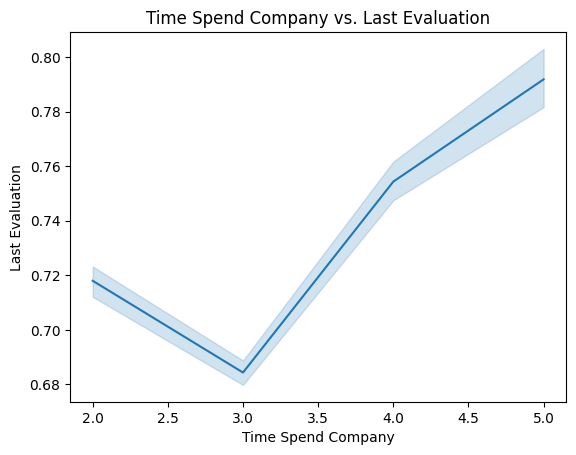

In [44]:
wn.simplefilter(action='ignore', category=FutureWarning)
sns.lineplot(data_filtered,x='time_spend_company',y='last_evaluation')
plt.title('Time Spend Company vs. Last Evaluation')
plt.xlabel('Time Spend Company')
plt.ylabel('Last Evaluation')

Last evaluation should is not be a factor that lead people to leave because employees leaving start with year 3 and it's rate is increasing but evaluation score is start higher with year 3 until year 5.

Text(0, 0.5, 'Average Monthly Hours')

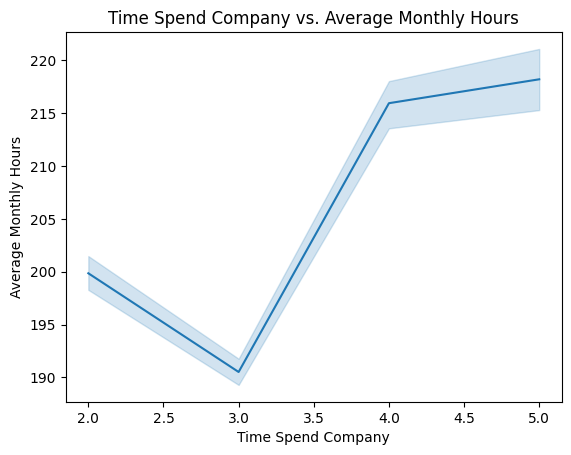

In [45]:
wn.simplefilter(action='ignore', category=FutureWarning)
sns.lineplot(data_filtered,x='time_spend_company',y='average_monthly_hours')
plt.title('Time Spend Company vs. Average Monthly Hours')
plt.xlabel('Time Spend Company')
plt.ylabel('Average Monthly Hours')

This plot also show the same thing employees aveage monthly hours are getting drop from year 2 to 3 (Lowest average monthly hours) then getting higher from year 3 until year 5 (Highest average monthly hours)

For now, no variable can suggest that why leaving cycle start with year 3 and getting higher until year 5.

However we can confirm that when average monthly hours is higher, the evaluation score is higher (This plot almost the same shape with time spend company vs. last evaluation).

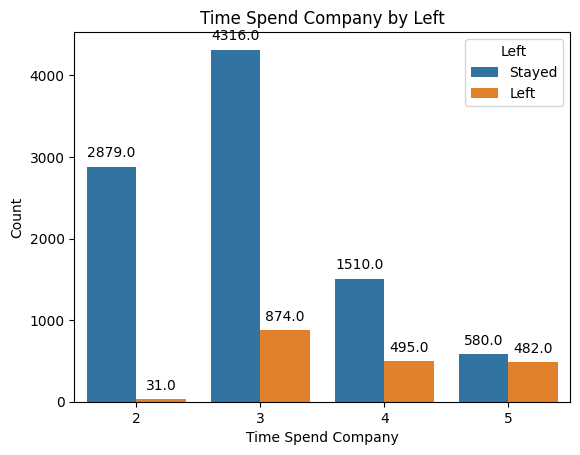

In [46]:
ax = sns.countplot(x='time_spend_company', hue='left', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Time Spend Company by Left')
plt.xlabel('Time Spend Company')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])

People seem to leave company after 2 years of work. 
At 2 years people leave least but at year 3, 4, 5 turnorver rate is dramatically increase. In year 5 people who leave and stay are almost in the same level.

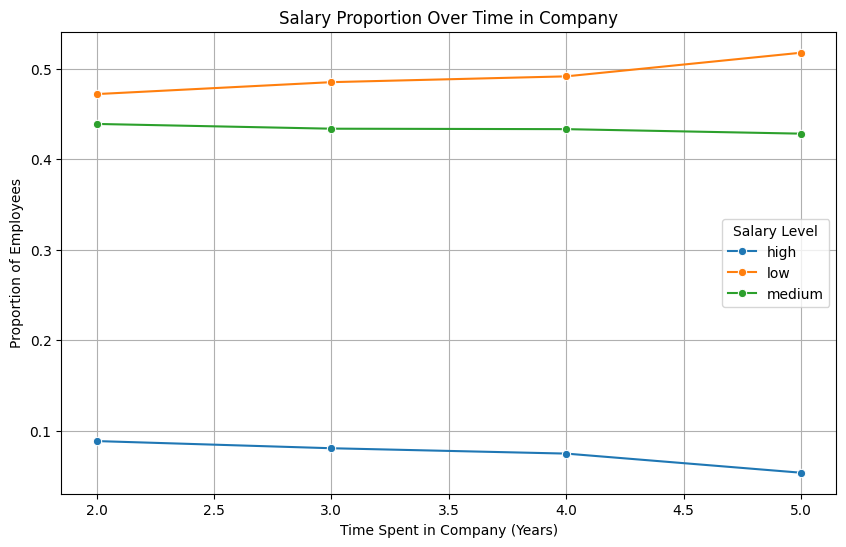

In [47]:
wn.simplefilter(action='ignore', category=FutureWarning)
salary_time = data_filtered.groupby(['time_spend_company', 'salary']).size().unstack()
# Calculate proportion of each salary level per year
salary_time_ratio = salary_time.div(salary_time.sum(axis=1), axis=0)

plt.figure(figsize=(10,6))
for salary_level in salary_time_ratio.columns:
    sns.lineplot(x=salary_time_ratio.index, y=salary_time_ratio[salary_level], label=salary_level, marker='o')

# Labels
plt.title('Salary Proportion Over Time in Company')
plt.xlabel('Time Spent in Company (Years)')
plt.ylabel('Proportion of Employees')
plt.legend(title='Salary Level')
plt.grid(True)

plt.show()

Even it is seem not significant but salary proportion is relate with the time spend company that employees start leaving at year 3 which is low salary portion start increasing until year 5 (sharp increase), in the other hand high salary portion is completely opposite shape of low salary. But medium salary is almost in stable shape.

Text(0.5, 0, 'Time Spend Company')

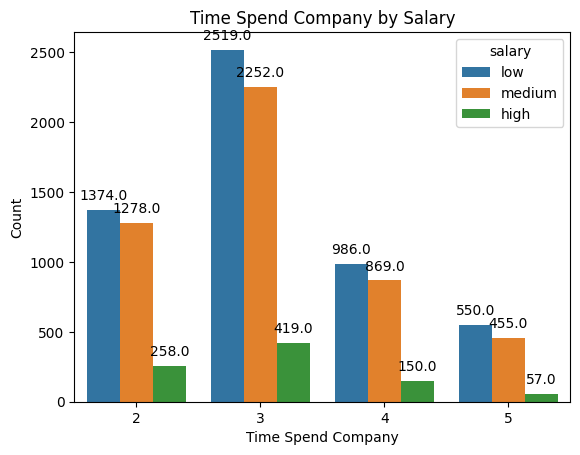

In [48]:
ax = sns.countplot(data_filtered, x='time_spend_company', hue='salary', hue_order=['low', 'medium', 'high'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Time Spend Company by Salary')
plt.ylabel('Count')
plt.xlabel('Time Spend Company')

In [49]:
print(data_filtered.groupby(['time_spend_company','salary'])['department'].count())
print(data_filtered.groupby('time_spend_company')['time_spend_company'].count())

time_spend_company  salary
2                   high       258
                    low       1374
                    medium    1278
3                   high       419
                    low       2519
                    medium    2252
4                   high       150
                    low        986
                    medium     869
5                   high        57
                    low        550
                    medium     455
Name: department, dtype: int64
time_spend_company
2    2910
3    5190
4    2005
5    1062
Name: time_spend_company, dtype: int64


This plot also suggest the same thing.

We can see that people with 2 years of work has the highest portion of high and medium salary and slightly reduce it portion in years 3 and 4 until year 5 which has remarkable deceasing of high portion, which mean it has highest number of low and medium salary with the lowest high salary employees.

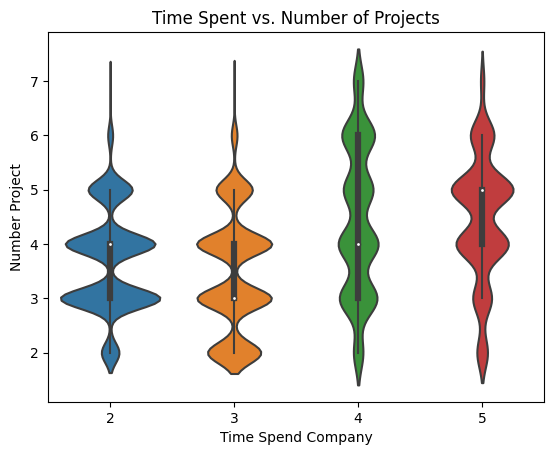

time_spend_company  number_project
2                   2                  200
                    3                 1133
                    4                 1019
                    5                  501
                    6                   56
                    7                    1
3                   2                 1129
                    3                 1577
                    4                 1590
                    5                  770
                    6                  121
                    7                    3
4                   2                  119
                    3                  475
                    4                  503
                    5                  374
                    6                  414
                    7                  120
5                   2                   66
                    3                  117
                    4                  326
                    5                  385
                   

In [50]:
ax=sns.violinplot(y='number_project', x='time_spend_company', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Time Spent vs. Number of Projects')
plt.xlabel('Time Spend Company')
plt.ylabel('Number Project')
plt.show()
print(data_filtered.groupby(['time_spend_company','number_project'])['number_project'].count())
print(data_filtered.groupby('time_spend_company')['number_project'].count())

project_counts = data_filtered.groupby(['time_spend_company', 'number_project'])['number_project'].count().reset_index(name='project_count')

# Grouping by 'time_spend_company' to get the total number of projects for each time spent
total_projects_per_company = data_filtered.groupby('time_spend_company')['number_project'].count().reset_index(name='total_projects')

# Merging the two DataFrames to get the distribution of number of projects by time spent in company
distribution_df = pd.merge(project_counts, total_projects_per_company, on='time_spend_company')

# Calculating the proportion of each project count by dividing project count by total projects for each time_spend_company
distribution_df['proportion'] = (distribution_df['project_count'] / distribution_df['total_projects']) * 100

# Pivoting the table to get a clearer format
pivot_table = distribution_df.pivot_table(index='time_spend_company', columns='number_project', values='proportion', aggfunc='sum')

# Display the resulting pivot table
print(pivot_table)

Employees that work for 3 years have the most amount of project, follow by 2,4 and 5 years respectively, this is not useful enough.

But if we look at the portion of number project by employees at each time spend company, we can see that at year 3 employee tend to be underwork because there are too many 2 number project compare to 2 year time spend, in the other hand in year 4 and 5, there are significantly increase of high workload which is >= 5 number project lead to overwork.

However, we need to consider the workload and intense on each project because a project might take more effort than many amount of projects.


Text(0, 0.5, 'Average Monthly Hours')

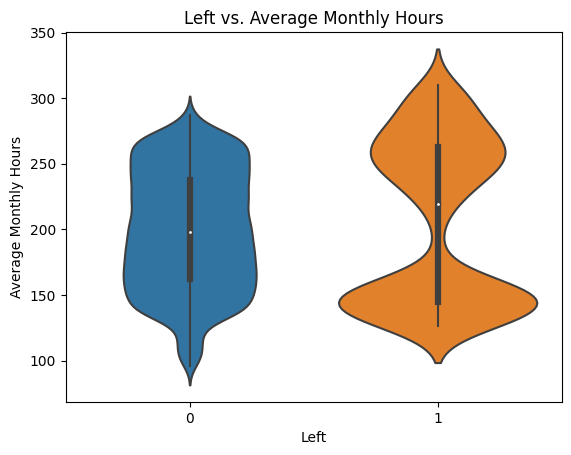

In [51]:
sns.violinplot(x='left', y='average_monthly_hours', data=data_filtered)
plt.title('Left vs. Average Monthly Hours')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')

There are a little bit difference between people who stay and leave, people who stay is work between 160 - 240 hours but people who leave is work between 150 - 260 which is wider range.
The median of people who leave is higher which is mean people who leave tend to work longer.

This plot also show that most of left employees are work around 125-160 hours(low performance) and 240 - 320 hours (high performance)

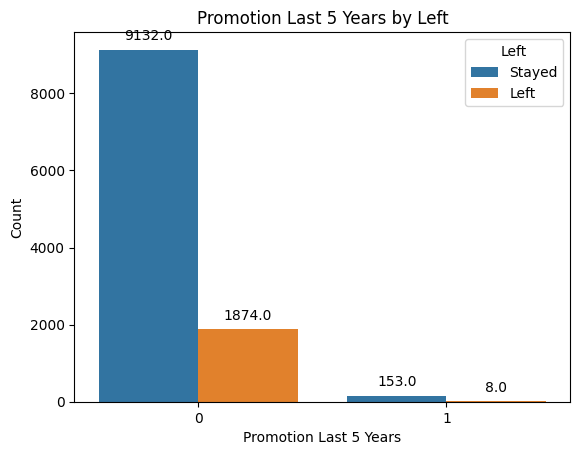

In [52]:
ax = sns.countplot(x='promotion_last_5years', hue='left', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Promotion Last 5 Years by Left')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])

In not promoted group there are 0.17% of leaving and in promoted group there are 0.04 of leaving.

This suggest that promotion might not be the main reason for leaving because percentage of leaving even got promoted is still almost the same level.

However, the chance of leaveing is a little bit decrese after got promoted, which might suggest that we should improve promotion process.

As we can see here, only 0.015% of employees that get promotion.

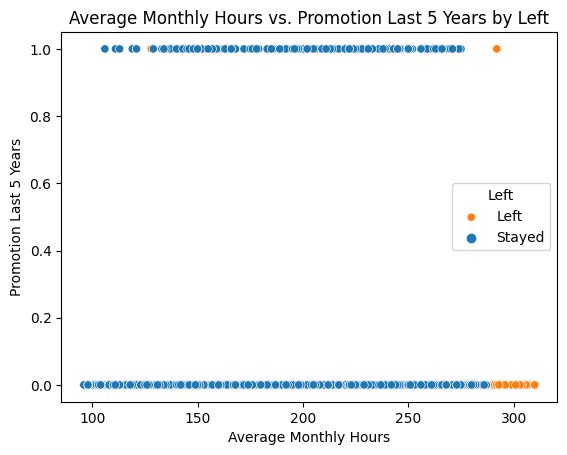

In [53]:
sns.scatterplot(data=data_filtered, x='average_monthly_hours', y='promotion_last_5years',
hue='left')
plt.title('Average Monthly Hours vs. Promotion Last 5 Years by Left')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Promotion Last 5 Years')
plt.legend(title='Left', labels=['Left', 'Stayed'])

This plot also confirm that employees who left work around 300 hours per month and only a few of them get promoted.

Also, promotion is not the main reason because employees who did not get promotion, but work lower hours still stay at company.

Text(0, 0.5, 'Count')

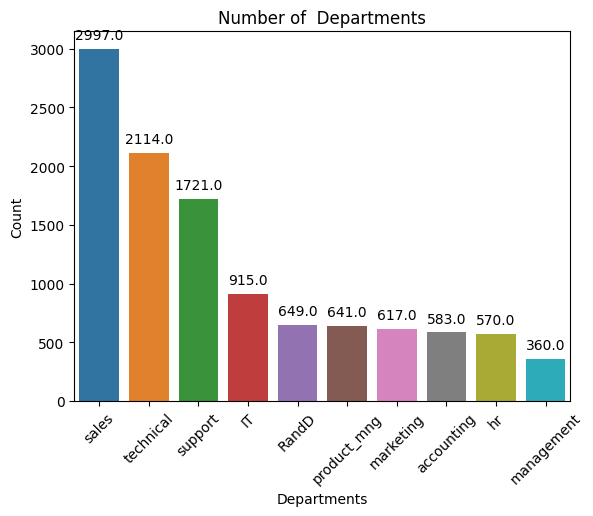

In [54]:
ax = sns.countplot(data = data_filtered, x='department', order=data_filtered['department'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 45)
plt.title('Number of  Departments')
plt.xlabel('Departments')
plt.ylabel('Count')

The highest number employees is Sales (2997), Technical(2114), Support(1721), IT(915), R&D(649), Product manager(641), Marketing(617), Accounting(583), HR(570), and Management(360) respectively

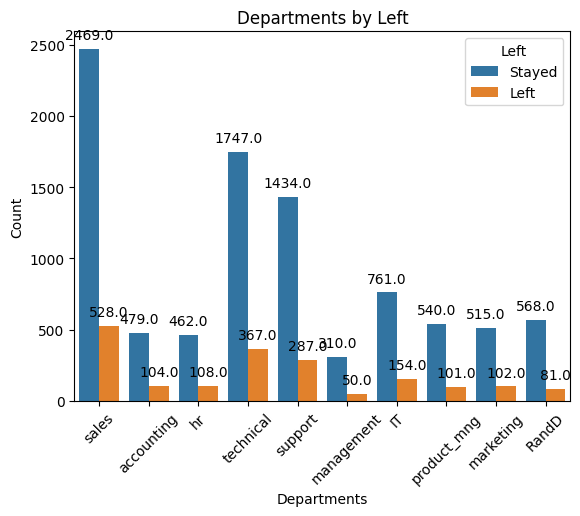

In [55]:
ax = sns.countplot(x='department', hue='left', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 45)
plt.title('Departments by Left')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])

In [56]:
data_filtered.groupby(['department','left'])['left'].count()

department   left
IT           0        761
             1        154
RandD        0        568
             1         81
accounting   0        479
             1        104
hr           0        462
             1        108
management   0        310
             1         50
marketing    0        515
             1        102
product_mng  0        540
             1        101
sales        0       2469
             1        528
support      0       1434
             1        287
technical    0       1747
             1        367
Name: left, dtype: int64

**The proportion of left people compare to whole department in percentage by departments**

So, the most left rate department is from 
* hr = 18.95
* accounting = 17.84
* sales = 17.62
* technical = 17.36
* it = 16.83
* support= 16.68
* marketing =16.53
* product_mng = 15.76
* management = 13.89
* the lowest RandD = 12.48 (Positive Result)

Then department is unlikely to be a main reason of decision to leave. But turnover rate of R&D and HR is interesting to investigate further.

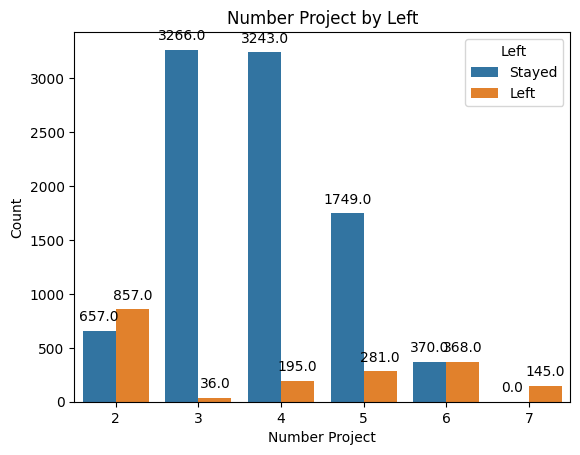

In [57]:
ax = sns.countplot(x='number_project', hue='left', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number Project by Left')
plt.xlabel('Number Project')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])

when number project are 2 there are people who leave than stay but when number project are 3,4 and 5 people likely to stay but decrease respectively until equally leave and stay at 6 until 7 people tend to leave more than stay.

This plot is show that number project is strongly relate with other features. 

So, when number project is 2 which is small number of project, employees spend less average monthly hours, evalualtion score is also lower. Also, this group has lower satisfaction level which has more chance to leave. Then this group is low performance group.

For normal (Stay) group, employees are more likely to stay, as you can see that there are 3 and 4 project number that are the lowest turnover rate group.

Lastly, High performance group, This group has more work and spend more average monthly hours to work and more likely to leave regardless any time spend company.

Note: Work accident did not play crucial role at all because as we inspect the plot above the higer project, the higer work accident and average monthly hours. 

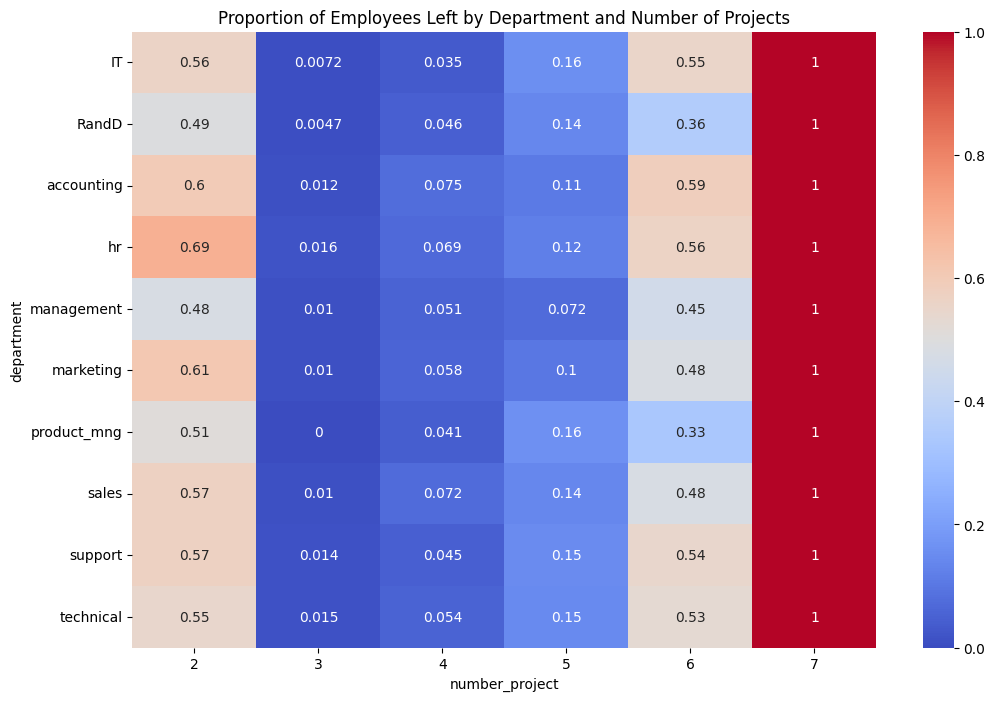

In [58]:
pivot_df = data_filtered.groupby(['department', 'number_project'])['left'].mean().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Proportion of Employees Left by Department and Number of Projects')
plt.show()

This plot clearly show that when number of project is 2 turnover rate is high, then decrease from 3,4 and 5 until 6 number project turnover rate is increase until number project is 7 tunrover rate is 100%.

This indicate that number project really a main factor of high turnover rate.

This is  also in some way relate with average monthly hours and last evaluation that the groups that left is low performance and high performance.

Text(0, 0.5, 'Last Evaluation')

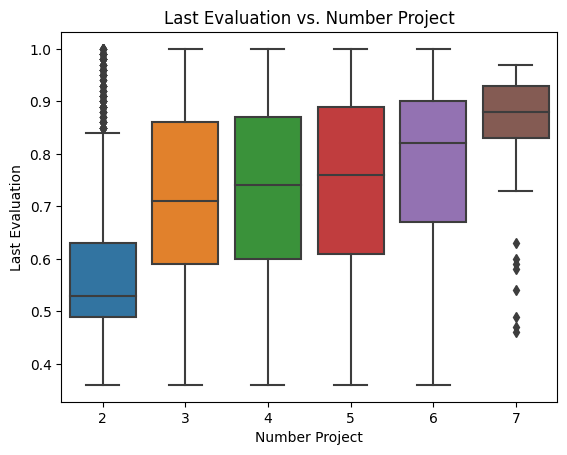

In [59]:
sns.boxplot(data_filtered, y='last_evaluation',x='number_project')
plt.title('Last Evaluation vs. Number Project')
plt.xlabel('Number Project')
plt.ylabel('Last Evaluation')

Now we can connect the dot.

2 number project indicate that if we increase amount of this number project it will cause employees' underwork and low evalaution score.
Ideal number project mostly should be between 3-4 number project.
Because if we increase number project to >= 5 employees will going to overwork stage.

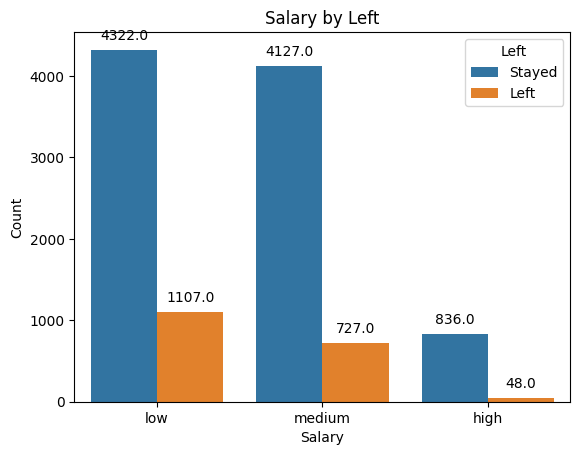

In [60]:
ax = sns.countplot(x='salary', hue='left', data=data_filtered)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Salary by Left')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Stayed', 'Left'])

In [61]:
data_filtered.groupby(['salary','left'])['left'].count()

salary  left
high    0        836
        1         48
low     0       4322
        1       1107
medium  0       4127
        1        727
Name: left, dtype: int64

Most of the salary range are low and medium.

It is seem higher salary will less the left, the high salary left rate is about 5 percent. The low salary left rate is about 20 percent and the medium salary left rate is about 15 percent. Which mean the higher salary, the left rate is lower.

So, even salary is seem only slightly effect on time spedn company, but it is surely that salary is a factor that lead to employees' leaving at year 3, 4 and 5

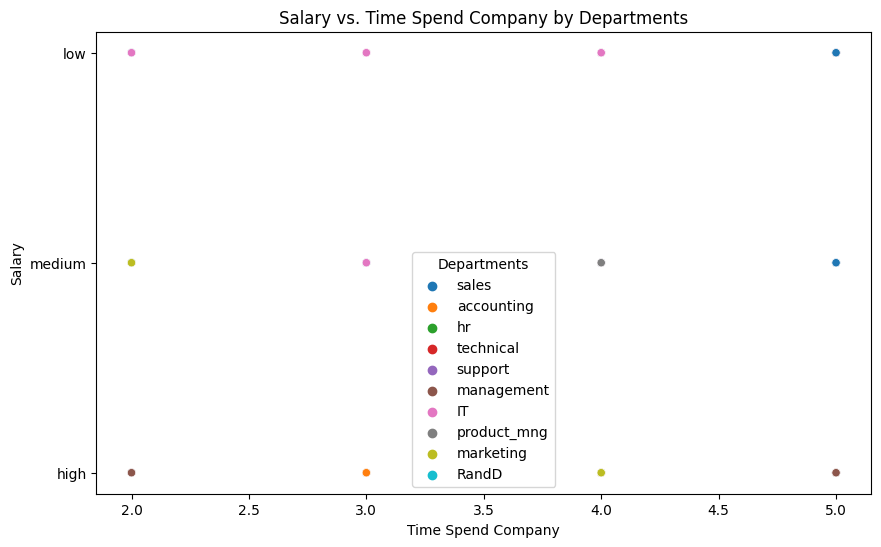

In [62]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data_filtered, y='salary', x='time_spend_company', hue='department')
plt.title('Salary vs. Time Spend Company by Departments')
plt.xlabel('Time Spend Company')
plt.ylabel('Salary')
plt.legend(title='Departments')

IT department
1. spend time between 2 - 4 years with mostly low salary
2. but some that work for 3 years is are in medium salaray.
   
Sales department
  1. spend 5 years for working and it both low and medium salary.
     
Marketing department
  1. spend 2 years for working with medium salary
  2. spend 4 years for working with high salary
     
Product Manager
1. spend 4 years for working with medium salary
   
Management
1. spend 2 years for working with high salary
2. spend 5 years for working with high salary
   
Accounting
1. spend 3 years for working with high salary
   

Text(0, 0.5, 'Satisfaction Level')

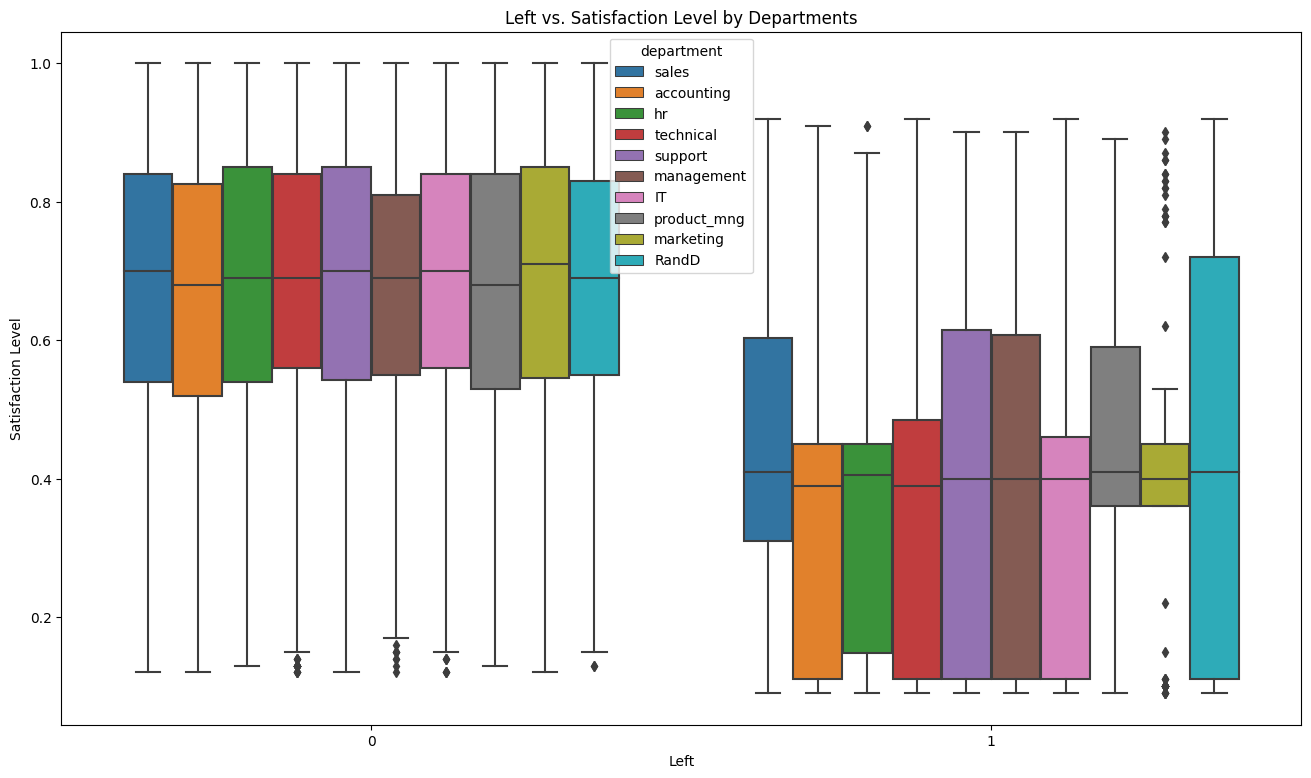

In [63]:
plt.figure(figsize = (16,9))
sns.boxplot(data_filtered, x='left', y='satisfaction_level', hue='department')
plt.title('Left vs. Satisfaction Level by Departments')
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')

The plot show that people that stay in every departments have equally satisfaction level which is around 0.55 - 0.85, however there are some outliers that have about 0 score in Technical,Management, IT, and R&D which could be next group of people who leaving company. So, we need to investigate further 
they also could be employees who has temporary satisfied or disatisfied.

But for group that people leave is very different

1.Sales ~0.3 - 0.6

2.Accounting ~0 - 0.4

3.HR ~0.1 - 0.4

4.Technical ~0 - 0.43

5.Support ~0 - 0.6

6.Management ~0 - 0.59

7.IT ~0 - 0.4

8.Product Manager ~0.38 - 0.55

9.Marketing ~0.38 ~ 0.4 but has some outliers about ~0 - 0.2 and 0.6 - 0.95

10.R&D ~0 - 0.7

medians are similar across departments or within each department's stay/leave group

Text(0, 0.5, 'Number Project')

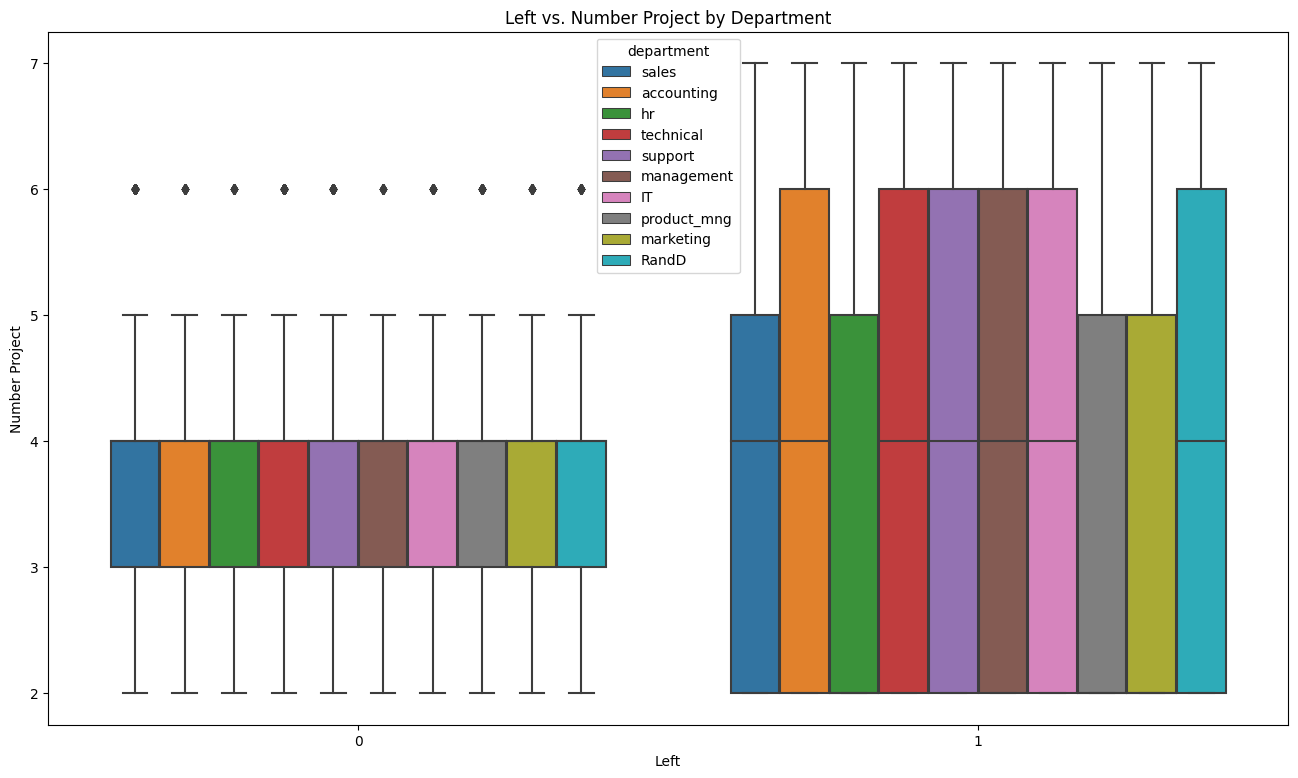

In [64]:
plt.figure(figsize = (16,9))
sns.boxplot(data_filtered, x='left',y='number_project', hue='department')
plt.title('Left vs. Number Project by Department')
plt.xlabel('Left')
plt.ylabel('Number Project')

Departments in stay group have the same level of number project between 3 and 4 but some outliers are in 6.

But for left group all departments start with 2 to 6 except Sales,HR,Product Manager and Marketing that end with 5.

Which mean range of left group is wider as we expect that people who leave tend to get more workload and less workload than stay group, however there are still people who work have the same workload with stay group but still leave. Then we need to investigate further about reason they leave.


Text(0, 0.5, 'Time Spend Company')

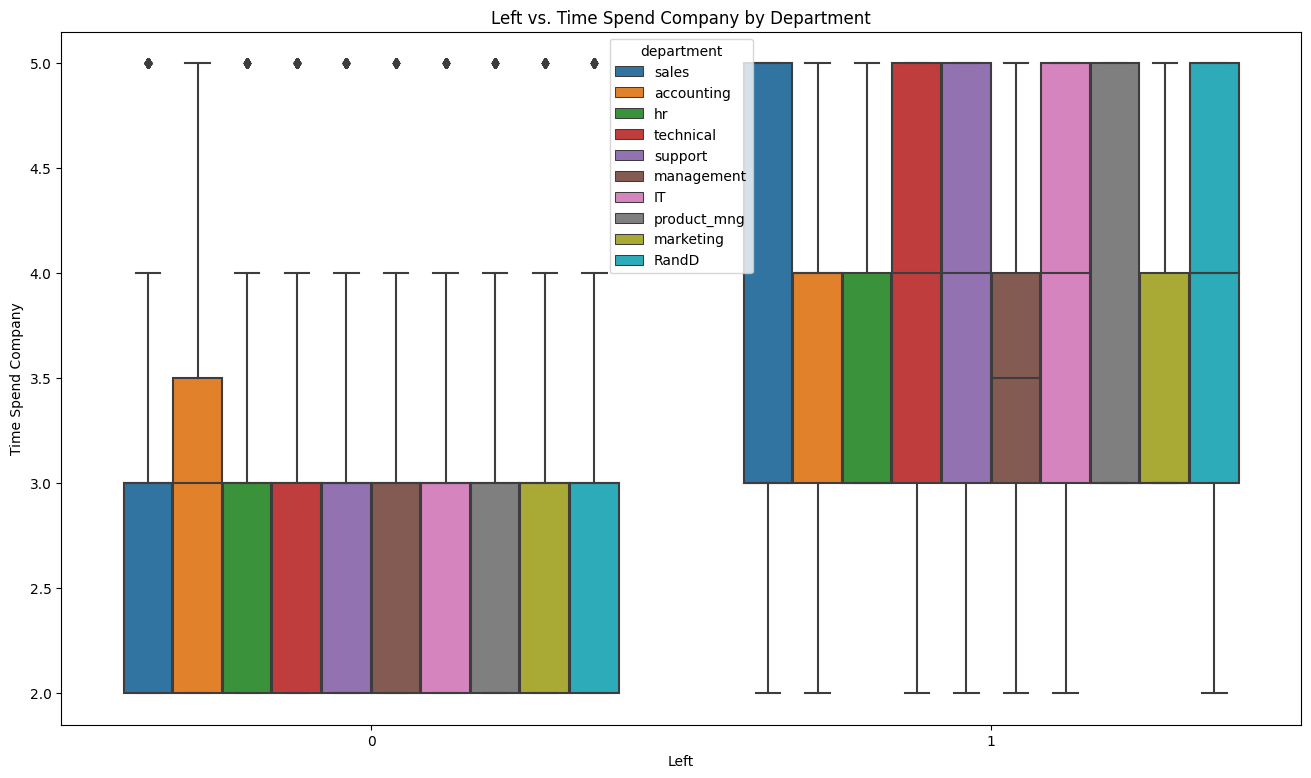

In [65]:
plt.figure(figsize = (16,9))
sns.boxplot(data_filtered, x='left',y='time_spend_company', hue='department')
plt.title('Left vs. Time Spend Company by Department')
plt.xlabel('Left')
plt.ylabel('Time Spend Company')

The plot cleary show that stay group work much less than left group.

Stay group spend 2 to 3 years except accounting that max at 3.5 years with some outliers that stay for 5 years.

Left group spend 3 to 5 years in all departments except Accounting,HR,Management and Marketing that max at 4 years


Text(0, 0.5, 'Last Evaluation')

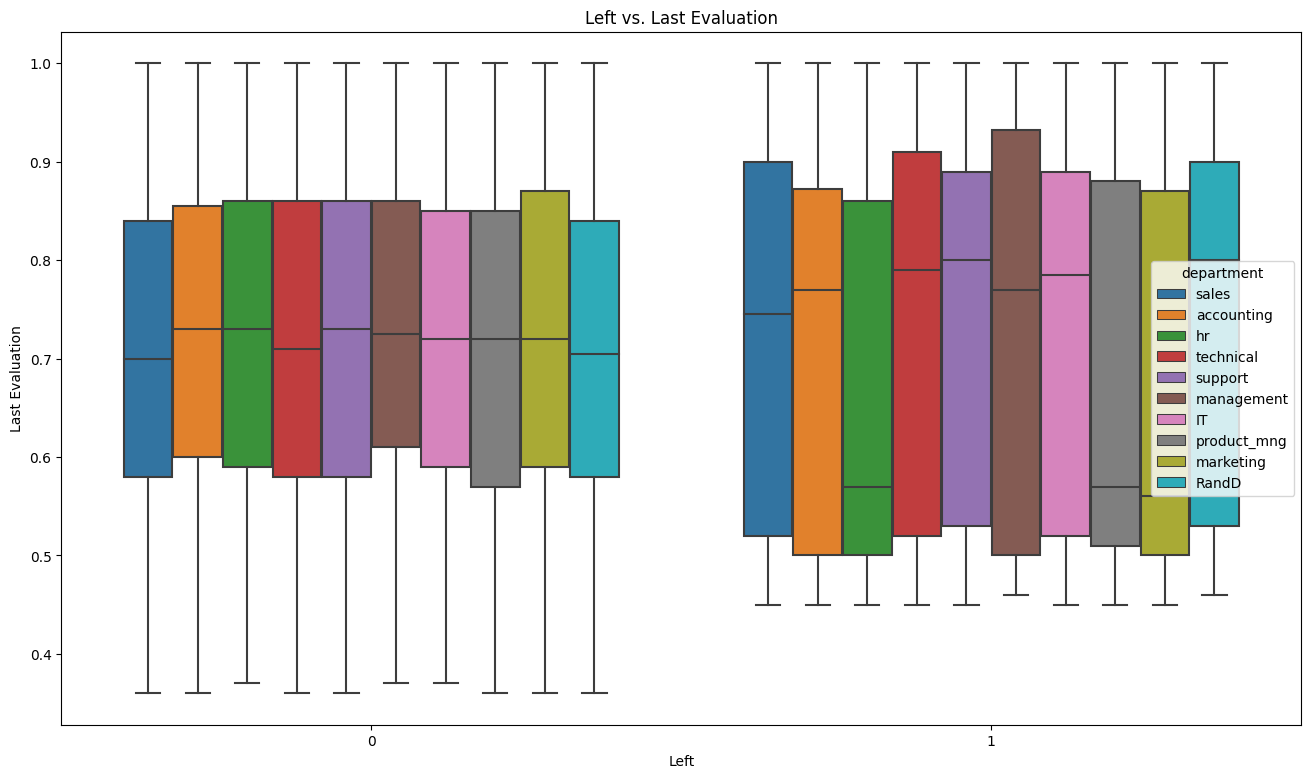

In [66]:
plt.figure(figsize = (16,9))
sns.boxplot(data_filtered, x='left',y='last_evaluation', hue='department')
plt.title('Left vs. Last Evaluation')
plt.xlabel('Left')
plt.ylabel('Last Evaluation')

Text(0, 0.5, 'Average Monthly Hours')

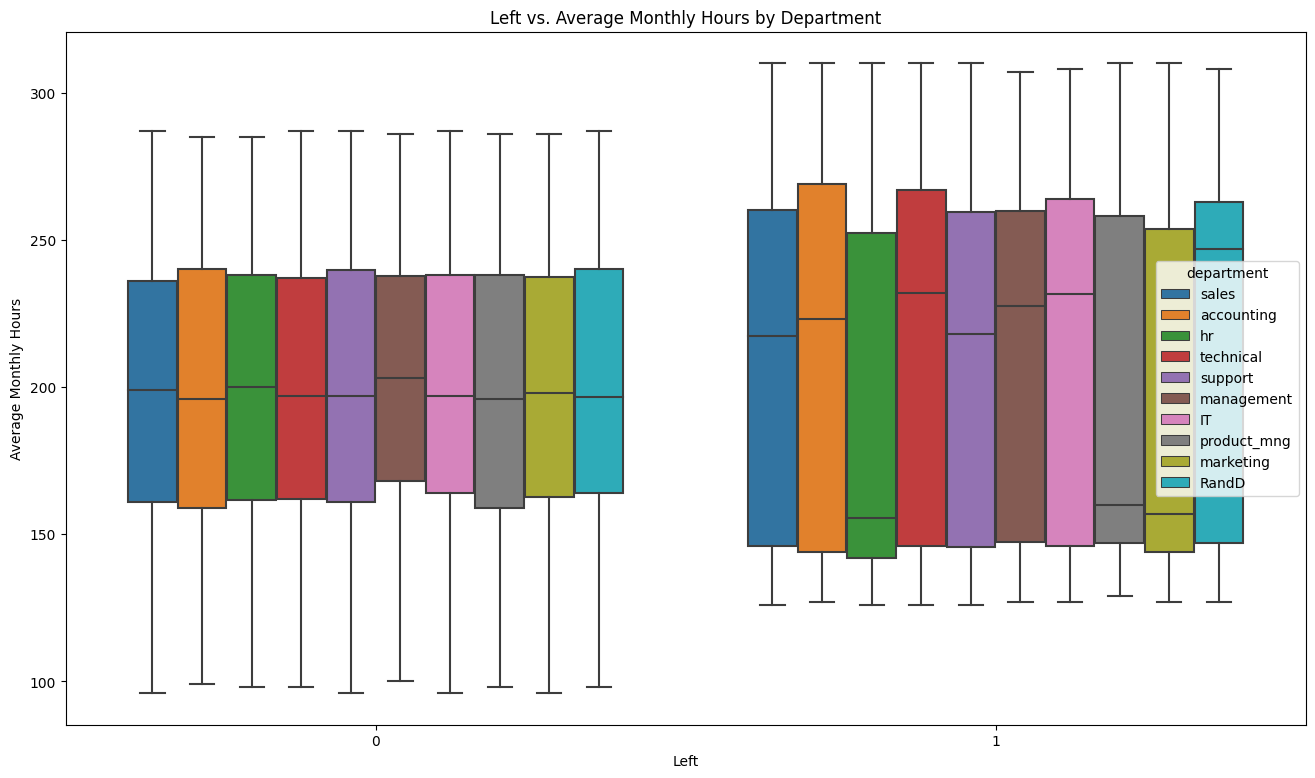

In [67]:
plt.figure(figsize = (16,9))
sns.boxplot(data_filtered, x='left',y='average_monthly_hours', hue='department')
plt.title('Left vs. Average Monthly Hours by Department')
plt.xlabel('Left')
plt.ylabel('Average Monthly Hours')

As the previous Left vs. AverageMonthlyHours this plot also show that every deparments in left and stay groups are almost have the same level of average monthly hours but the range is wider in the left group.

However, because of limit ability of box plot, the violin plot suggest that left employees are the high and low performance group which is more precise.

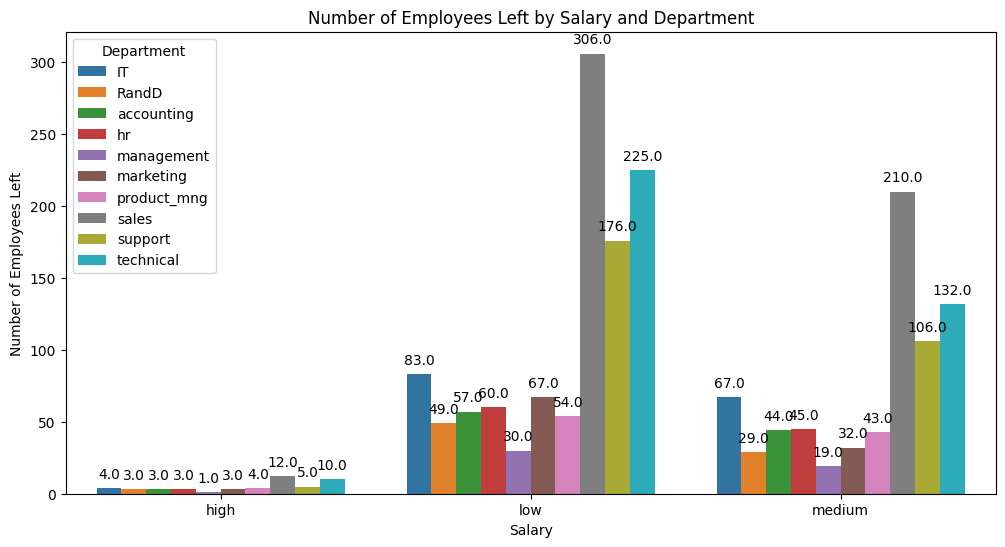

In [68]:
left_employees = data_filtered[data_filtered['left'] == 1]
left_counts = left_employees.groupby(['salary', 'department']).size().reset_index(name='left_count')


# Create a grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=left_counts, x='salary', y='left_count', hue='department')
plt.title('Number of Employees Left by Salary and Department')
plt.xlabel('Salary')
plt.ylabel('Number of Employees Left')
plt.legend(title='Department')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [69]:
# Calculate left percentages in all salary band by departments
data_filtered.groupby(['salary', 'department'])['left'].mean() * 100

salary  department 
high    IT              5.797101
        RandD           6.818182
        accounting      5.084746
        hr              8.108108
        management      1.190476
        marketing       5.357143
        product_mng     8.888889
        sales           5.660377
        support         4.201681
        technical       6.289308
low     IT             18.485523
        RandD          16.118421
        accounting     20.000000
        hr             20.833333
        management     22.900763
        marketing      23.508772
        product_mng    16.615385
        sales          20.844687
        support        21.515892
        technical      20.910781
medium  IT             16.876574
        RandD           9.634551
        accounting     18.410042
        hr             18.367347
        management     13.103448
        marketing      11.594203
        product_mng    15.867159
        sales          15.945330
        support        13.520408
        technical      

Text(0, 0.5, 'Count')

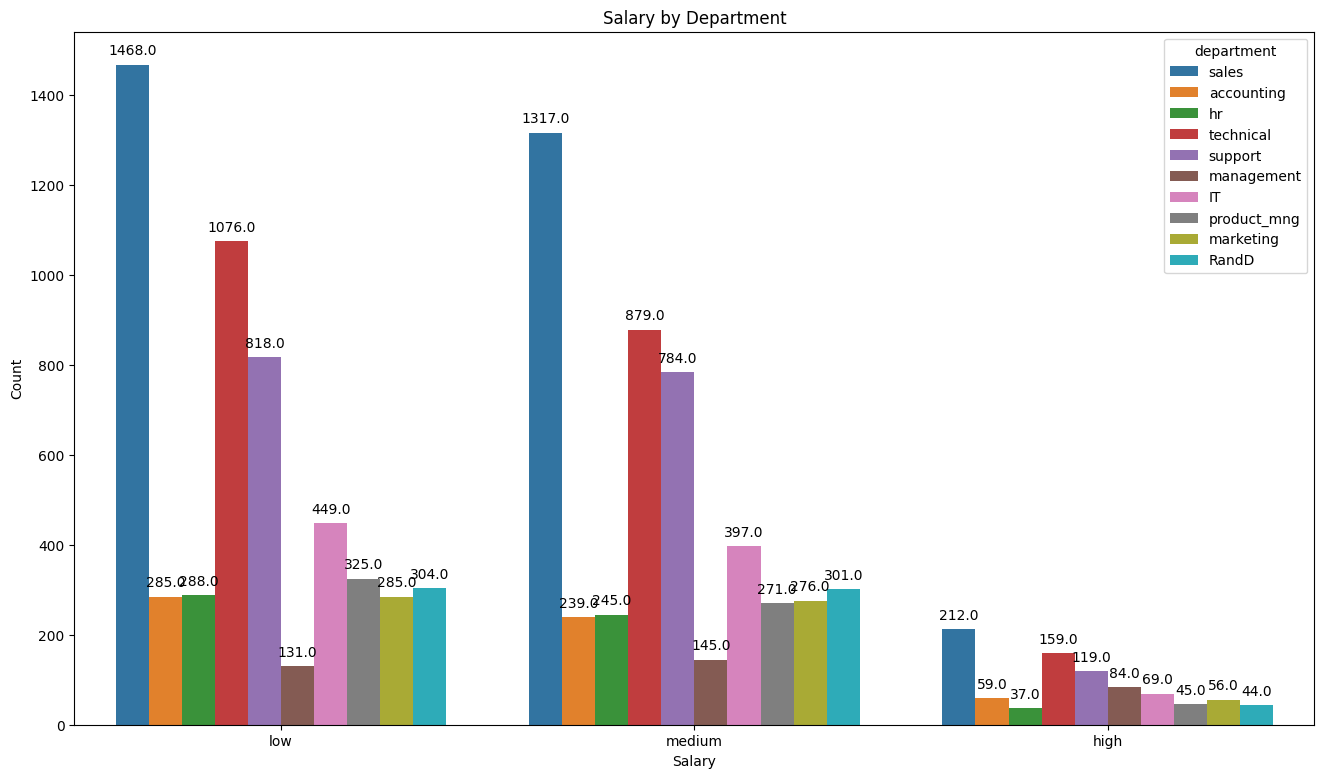

In [70]:
plt.figure(figsize = (16,9))
ax = sns.countplot(data_filtered, x='salary',hue='department')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Salary by Department')
plt.xlabel('Salary')
plt.ylabel('Count')

In [71]:
department_counts = data_filtered.groupby(['salary', 'department']).size()

# Calculate the total count for each salary group
salary_totals = data_filtered.groupby('salary').size()

# Calculate the percentage
percentages = (department_counts / salary_totals) * 100

# Convert the result to a DataFrame and reset the index
result_df = percentages.reset_index(name='percentage')

# Print the result
print(result_df.to_markdown(index=False, numalign="left", stralign="left"))

| salary   | department   | percentage   |
|:---------|:-------------|:-------------|
| high     | IT           | 7.80543      |
| high     | RandD        | 4.97738      |
| high     | accounting   | 6.67421      |
| high     | hr           | 4.18552      |
| high     | management   | 9.50226      |
| high     | marketing    | 6.33484      |
| high     | product_mng  | 5.0905       |
| high     | sales        | 23.9819      |
| high     | support      | 13.4615      |
| high     | technical    | 17.9864      |
| low      | IT           | 8.2704       |
| low      | RandD        | 5.59956      |
| low      | accounting   | 5.24959      |
| low      | hr           | 5.30484      |
| low      | management   | 2.41297      |
| low      | marketing    | 5.24959      |
| low      | product_mng  | 5.98637      |
| low      | sales        | 27.04        |
| low      | support      | 15.0672      |
| low      | technical    | 19.8195      |
| medium   | IT           | 8.17882      |
| medium   

Every departments have almost same portion in each group salary compare with other departments in their group, So amount of each department will decrease when the level of salary is higher, especially, high salary group that amount will dramatically drop. However, there are some departments that almost at the same level in all groups which is managment.

Also, the decreasing of amount is in different portion in each department.

Sales = 27.04, 27.1323, 23.9819 (4% decrease from low and medium)

accounting = 5.24959, 4.92377, 6.67421 (1% incease from low and medium)

hr = 5.30484, 5.04738, 4.18552 (1% decrease from low and medium)

technical = 19.8195, 18.1088, 17.9864 (1% decease at every groups)

support = 15.0672, 16.1516, 13.4615 (1% increase at medium, 3% decrease at medium)

management = 2.41297, 2.98723, 9.50226 (7% increase from low and medium) it might be because most of management employees are high level for example senior and C-Level.

IT = 8.2704, 8.17882, 7.80543 (almost the same level)

product_mng = 5.98637, 5.58302, 5.0905 (slightly decrease 0.5% from low to high)

marketing = 5.24959, 5.68603, 6.33484 (1% increase from low)

RandD = 5.59956, 6.20107, 4.97738 (0.6% increase from low, 1% increase from medium)

for some that increase it might be bad salary progession, or compensation, in the other hand for some that decrease it might come from bad compensation, carreer progression and higher-paid employees.

Text(0, 0.5, 'Last Evaluation')

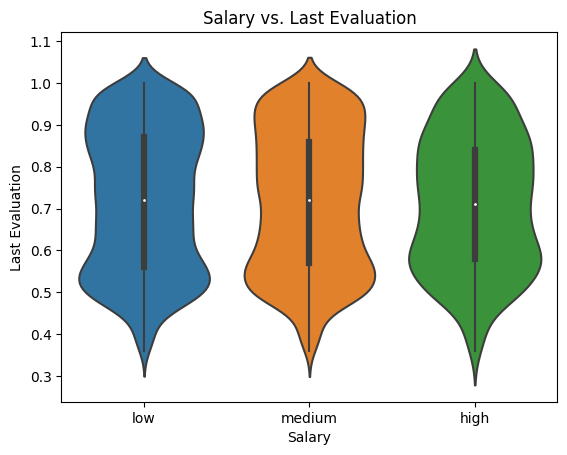

In [72]:
sns.violinplot(data_filtered, y='last_evaluation',x='salary')
plt.title('Salary vs. Last Evaluation')
plt.xlabel('Salary')
plt.ylabel('Last Evaluation')

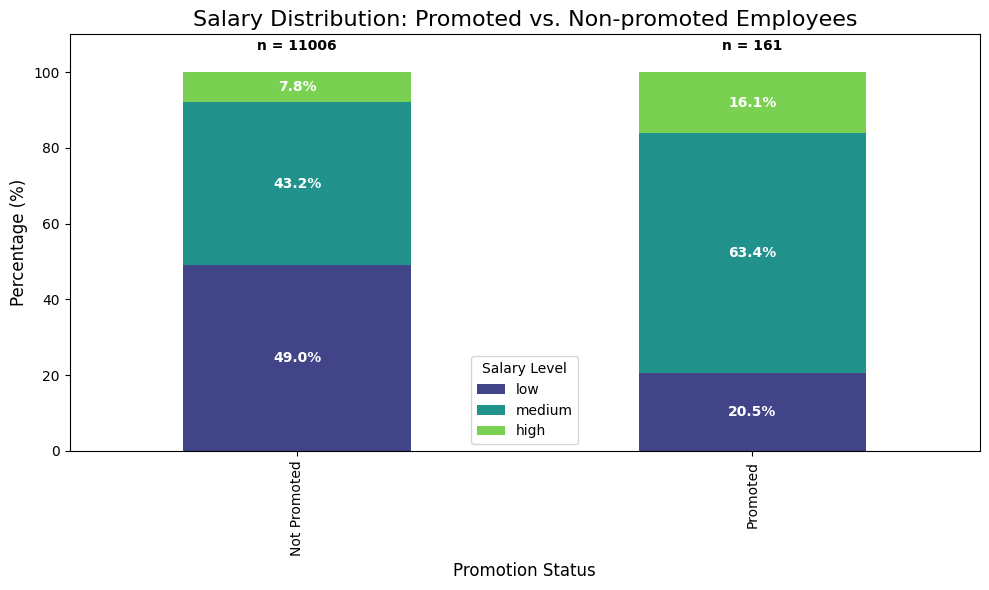

In [73]:
# Calculate the counts and percentages
salary_promotion_counts = pd.crosstab(
    data_filtered['promotion_last_5years'], 
    data_filtered['salary'],
    normalize='index'
) * 100

# Ensure columns are in the desired order (low, medium, high)
salary_promotion_counts = salary_promotion_counts[['low', 'medium', 'high']]

# Create stacked percentage bars
ax = salary_promotion_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=plt.cm.viridis([0.2, 0.5, 0.8])
)

# Add percentage labels on the bars
for i, (idx, row) in enumerate(salary_promotion_counts.iterrows()):
    cumulative = 0
    for j, v in enumerate(row):
        x_pos = i
        y_pos = cumulative + v/2
        ax.text(x_pos, y_pos, f'{v:.1f}%', ha='center', va='center', fontweight='bold', color='white')
        cumulative += v

# Add counts as title above each bar
total_counts = data_filtered.groupby('promotion_last_5years').size()
for i, (idx, count) in enumerate(total_counts.items()):
    ax.text(i, 105, f'n = {count}', ha='center', va='bottom', fontweight='bold')

plt.title('Salary Distribution: Promoted vs. Non-promoted Employees', fontsize=16)
plt.xlabel('Promotion Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.ylim(0, 110)  # Make room for count annotations
plt.legend(title='Salary Level')
plt.tight_layout()
plt.show()

Employees that get promoted have more portion of high and medium salary:

16.1% and 63.4% with 20.5% low

for employees who did not get promote:

7.8% and 43.2% with 49% low

This might suggest that people tend to get more salary if get promoted then promotion increasing salary, employees might decide to stay more.

promotion_last_5years  department 
0                      IT              913
                       RandD           629
                       accounting      577
                       hr              563
                       management      343
                       marketing       594
                       product_mng     641
                       sales          2946
                       support        1706
                       technical      2094
1                      IT                2
                       RandD            20
                       accounting        6
                       hr                7
                       management       17
                       marketing        23
                       sales            51
                       support          15
                       technical        20
Name: department, dtype: int64

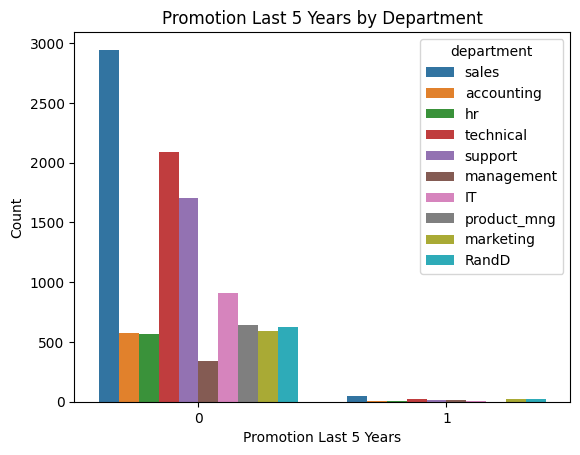

In [74]:
sns.countplot(data_filtered, x='promotion_last_5years', hue='department')
plt.title('Promotion Last 5 Years by Department')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
data_filtered.groupby(['promotion_last_5years','department'])['department'].count()

The promotion rate by departments:

1.	Management → 4.72%
2.  Marketing → 3.73%
3.	R&D → 3.08%
4.	Sales → 1.70%
5.	HR → 1.23%
6.	Accounting → 1.03%
7.	Technical → 0.95%
8.	Support → 0.87%
9.	IT → 0.22%
10.	Product Management → 0.00% (No one get promoted)

# Modeling
1. XGBoost
2. XGBoost + Tuned Parameters
3. XGBoost + Tuned Parameters + Upsampling
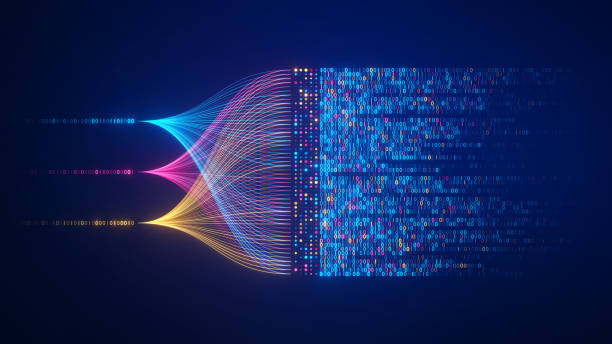
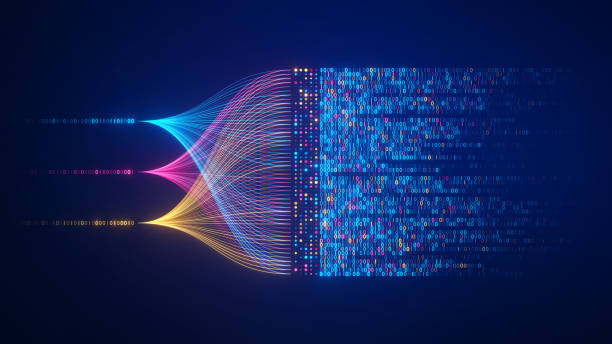

## Prepare data for the first model

In [75]:
# Define target variable with prepared dataset using 'get_dummies'
y = pd.get_dummies(data_filtered['left'],drop_first = True)

In [76]:
# Drop target variable
X = data_filtered.copy()
X = X.drop(['left'], axis = 1)

# get_dummies on categorical data
X = pd.get_dummies(X, columns = ['department','salary'],drop_first = True)

In [77]:
# Split data into 80 and 20 portion
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size = 0.2,stratify = y,random_state = 0)

In [78]:
# Split data into 60,20 and 20 portion
X_train, X_val, y_train, y_val = train_test_split(X_tr,y_tr, test_size = 0.25, stratify = y_tr, random_state = 0)

In [79]:
X_tr.shape,X_train.shape,X_val.shape,X_test.shape,y_tr.shape,y_train.shape,y_val.shape,y_test.shape

((8933, 18),
 (6699, 18),
 (2234, 18),
 (2234, 18),
 (8933, 1),
 (6699, 1),
 (2234, 1),
 (2234, 1))

## #1 XGBoost

In [80]:
# Instatiate XGBoost
xgb = XGBClassifier(objective='binary:logistic',random_state = 0,eval_metric='logloss')

# Set parameters
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01],
             'n_estimators': [800]
             }

# Define metrics
scoring = {'accuracy','precision','recall','f1'}

# Include GridSearchCV to the model
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit = 'f1')

In [81]:
# Train the model

xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [800]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'})

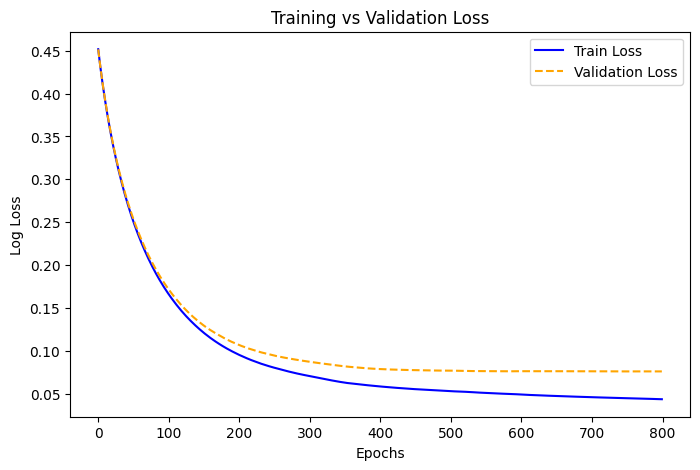

In [82]:
best_params = xgb_cv.best_params_
xgb_best = XGBClassifier(**best_params, objective='binary:logistic', random_state=0, eval_metric='logloss')

# Train with evaluation set
eval_set = [(X_train, y_train), (X_val, y_val)]
xgb_best.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Get training and validation log loss
results = xgb_best.evals_result()
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [83]:
xgb_cv.best_score_

0.9430439166589958

In [84]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 800}

In [85]:
# Predict on the validate set
y_pred_val = xgb_cv.best_estimator_.predict(X_val)

In [86]:
target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred_val, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      0.99      0.99      1858
        left       0.97      0.91      0.94       376

    accuracy                           0.98      2234
   macro avg       0.97      0.95      0.96      2234
weighted avg       0.98      0.98      0.98      2234



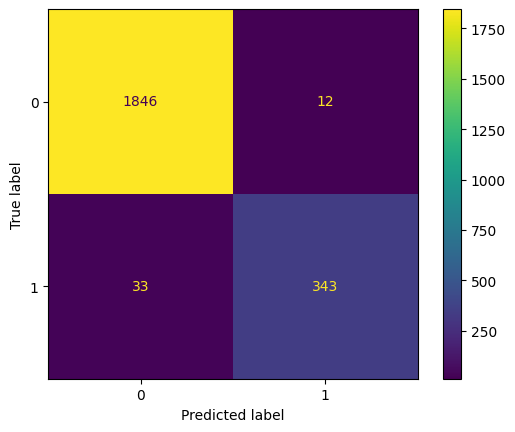

In [87]:
# Conduct confusion matrix to see the result
cm = confusion_matrix(y_val,y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [88]:
# Predict on the test set
y_pred_test = xgb_cv.best_estimator_.predict(X_test)

In [89]:
target_labels = ['stay', 'left']
print(classification_report(y_test, y_pred_test, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      1857
        left       0.98      0.94      0.96       377

    accuracy                           0.99      2234
   macro avg       0.98      0.97      0.97      2234
weighted avg       0.99      0.99      0.99      2234



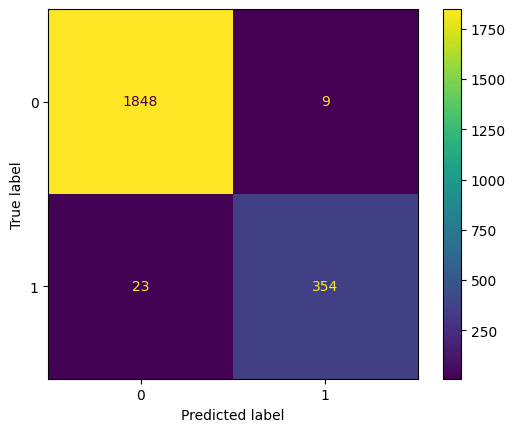

In [90]:
cm = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

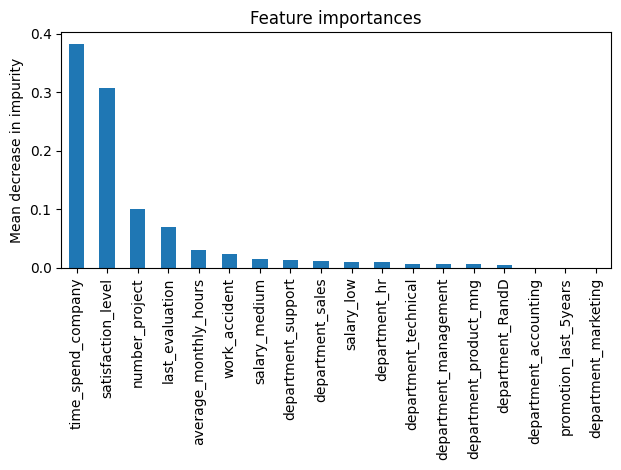

In [91]:
# Plot feature_importances_ to see which variables influence result the most
importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)
xgb_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [92]:
# Get metrics score
print('accuracy:',accuracy_score(y_test,y_pred_test))
print('precision:',precision_score(y_test,y_pred_test))
print('recall:',recall_score(y_test,y_pred_test))
print('f1:',f1_score(y_test,y_pred_test))
print('auc:',roc_auc_score(y_test,y_pred_test))

# Define for comparing score of every models at the end
accuracy = accuracy_score(y_test,y_pred_test)
precision = precision_score(y_test,y_pred_test)
recall = recall_score(y_test,y_pred_test)
f1 = f1_score(y_test,y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)

accuracy: 0.9856759176365264
precision: 0.9752066115702479
recall: 0.9389920424403183
f1: 0.9567567567567568
auc: 0.9670727578922108


## #2 XGBoost with Upsampled Only

In [93]:
xgb_cv2 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit = 'f1')

In [94]:

xgb_cv2.fit(X_train2,y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [800]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'})

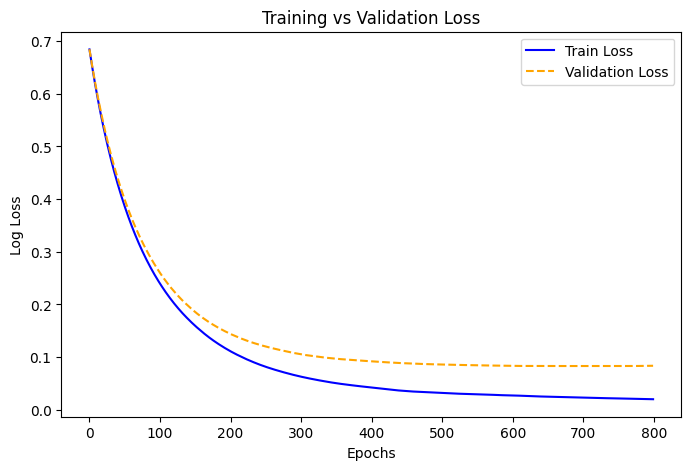

In [95]:
best_params = xgb_cv2.best_params_
xgb_best = XGBClassifier(**best_params, objective='binary:logistic', random_state=0, eval_metric='logloss')

# Train with evaluation set
eval_set = [(X_train2, y_train2), (X_val2, y_val2)]
xgb_best.fit(X_train2, y_train2, eval_set=eval_set, verbose=False)

# Get training and validation log loss
results = xgb_best.evals_result()
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [96]:
xgb_cv2.best_score_

0.9918277943515917

In [97]:
xgb_cv2.best_params_

{'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 800}

In [98]:
y_pred_val2 = xgb_cv2.best_estimator_.predict(X_val2)

In [99]:

target_labels = ['stay', 'left']
print(classification_report(y_val2, y_pred_val2, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      0.99      0.99      1858
        left       0.95      0.91      0.93       376

    accuracy                           0.98      2234
   macro avg       0.97      0.95      0.96      2234
weighted avg       0.98      0.98      0.98      2234



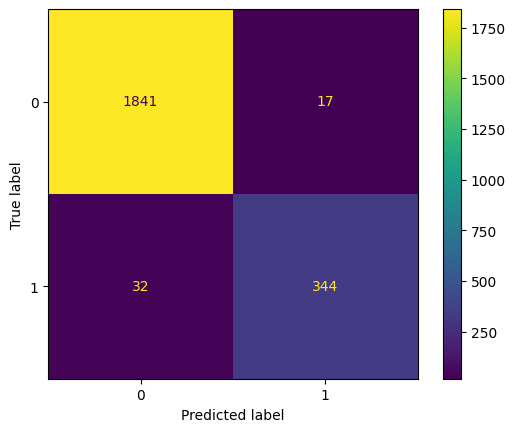

In [100]:
cm = confusion_matrix(y_val2,y_pred_val2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [101]:
y_pred_test2 = xgb_cv2.best_estimator_.predict(X_test2)

In [102]:

target_labels = ['stay', 'left']
print(classification_report(y_test2, y_pred_test2, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      0.99      0.99      1857
        left       0.94      0.95      0.95       377

    accuracy                           0.98      2234
   macro avg       0.97      0.97      0.97      2234
weighted avg       0.98      0.98      0.98      2234



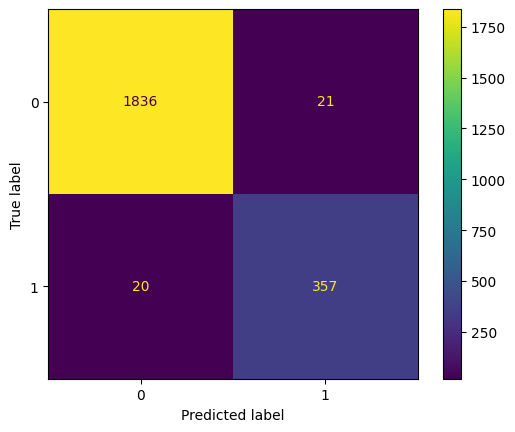

In [103]:
cm = confusion_matrix(y_test2,y_pred_test2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

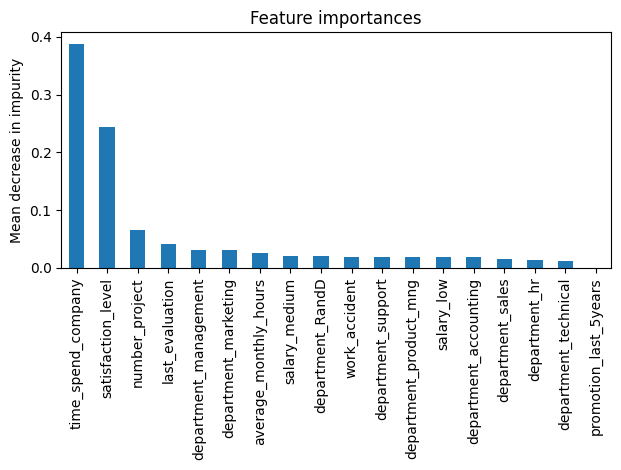

In [104]:
importances = xgb_cv2.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test2.columns)
xgb_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [105]:
print('accuracy:',accuracy_score(y_test2,y_pred_test2))
print('precision:',precision_score(y_test2,y_pred_test2))
print('recall:',recall_score(y_test2,y_pred_test2))
print('f1:',f1_score(y_test2,y_pred_test2))
print('auc:',roc_auc_score(y_test2,y_pred_test2))
accuracy2 = accuracy_score(y_test2, y_pred_test2)
precision2 = precision_score(y_test2, y_pred_test2)
recall2 = recall_score(y_test2, y_pred_test2)
f12 = f1_score(y_test2, y_pred_test2)
auc2 = roc_auc_score(y_test2, y_pred_test2)

accuracy: 0.9816472694717995
precision: 0.9444444444444444
recall: 0.946949602122016
f1: 0.9456953642384106
auc: 0.9678205199624619


## #3 XGBoost with Tuned Parameters and Upsampled

In [106]:
cv_params = {'max_depth': [3,6,9],
             'min_child_weight': [3,5],
             'learning_rate': [0.01],
             'n_estimators': [500,800,1000],
             'subsample':[0.7],
             'colsample_bytree':[0.7],
             'gamma': [0, 1],
             'reg_alpha': [0, 0.01],
             'reg_lambda': [0.1, 1]
             }
xgb_cv3 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit = 'f1')

In [107]:

xgb_cv3.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7], 'gamma': [0, 1],
                         'learning_rate': [0.01], 'max_depth': [3, 6, 9],
                         'min_child_weight': [3, 5],
                         'n_estimators': [500, 800, 1000],
                         'reg_alpha': [0, 0.01], 'reg_lambda': [0.1, 1],
                         'subsample': [0.7]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'})

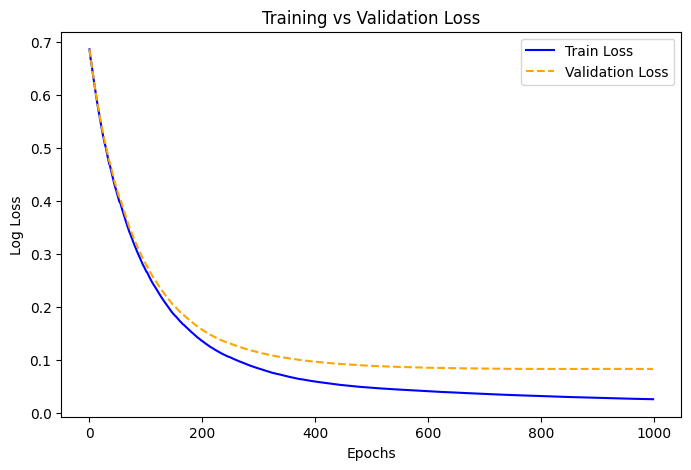

In [108]:
best_params = xgb_cv3.best_params_
xgb_best = XGBClassifier(**best_params, objective='binary:logistic', random_state=0, eval_metric='logloss')

# Train with evaluation set
eval_set = [(X_train2, y_train2), (X_val2, y_val2)]
xgb_best.fit(X_train2, y_train2, eval_set=eval_set, verbose=False)

# Get training and validation log loss
results = xgb_best.evals_result()
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Plot loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [109]:
xgb_cv3.best_score_

0.9889595486269119

In [110]:
xgb_cv3.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 1000,
 'reg_alpha': 0.01,
 'reg_lambda': 0.1,
 'subsample': 0.7}

In [111]:
y_pred_val3 = xgb_cv3.best_estimator_.predict(X_val2)

In [112]:

target_labels = ['stay', 'left']
print(classification_report(y_val2, y_pred_val3, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      0.99      0.99      1858
        left       0.95      0.92      0.93       376

    accuracy                           0.98      2234
   macro avg       0.97      0.95      0.96      2234
weighted avg       0.98      0.98      0.98      2234



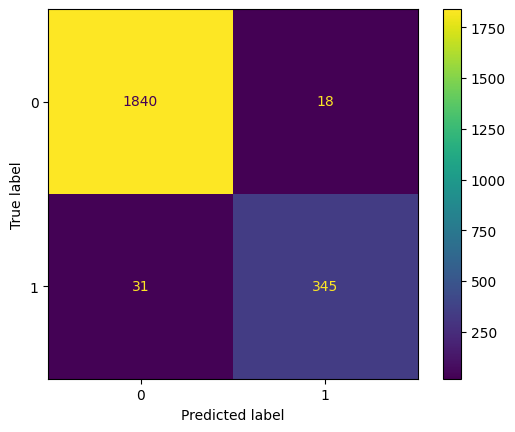

In [113]:

cm = confusion_matrix(y_val2,y_pred_val3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [114]:
y_pred_test3 = xgb_cv3.best_estimator_.predict(X_test2)

In [115]:

target_labels = ['stay', 'left']
print(classification_report(y_test2, y_pred_test3, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      0.99      0.99      1857
        left       0.96      0.95      0.96       377

    accuracy                           0.99      2234
   macro avg       0.98      0.97      0.97      2234
weighted avg       0.99      0.99      0.99      2234



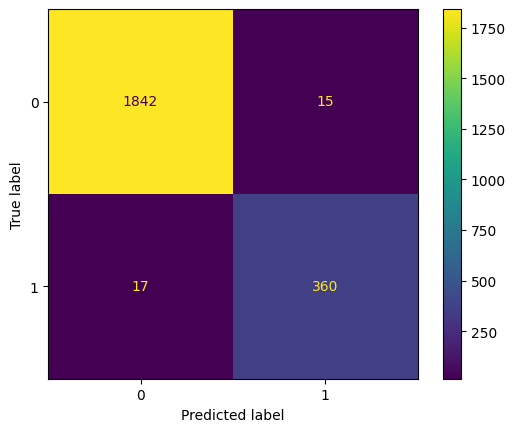

In [116]:
cm = confusion_matrix(y_test2,y_pred_test3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

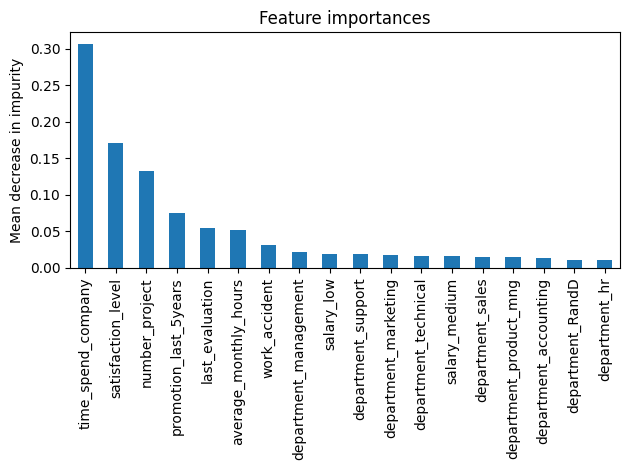

In [117]:
importances = xgb_cv3.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test2.columns)
xgb_importances.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [118]:
print('accuracy:',accuracy_score(y_test2,y_pred_test3))
print('precision:',precision_score(y_test2,y_pred_test3))
print('recall:',recall_score(y_test2,y_pred_test3))
print('f1:',f1_score(y_test2,y_pred_test3))
print('auc:',roc_auc_score(y_test2,y_pred_test3))
accuracy3 = accuracy_score(y_test2, y_pred_test3)
precision3 = precision_score(y_test2, y_pred_test3)
recall3 = recall_score(y_test2, y_pred_test3)
f1_3 = f1_score(y_test2, y_pred_test3)
auc3 = roc_auc_score(y_test2, y_pred_test3)

accuracy: 0.9856759176365264
precision: 0.96
recall: 0.9549071618037135
f1: 0.9574468085106382
auc: 0.9734148086886096


# Random Forest

In [119]:
rf = RandomForestClassifier( random_state = 0)
cv_params = {
    'n_estimators': [50,100],  
    'max_depth' : [10,50],
    'min_samples_leaf' : [0.5,1],
    'min_samples_split' : [0.001, 0.01],
    'max_features' : ["sqrt"],
    'max_samples' : [.5,.9]}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1',n_jobs = -1,verbose = 1)

In [120]:

rf_cv.fit(X_train,y_train[1])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [121]:
rf_cv.best_score_

0.9435627364701501

In [122]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [123]:
y_pred_val_rf = rf_cv.best_estimator_.predict(X_val)

In [124]:

target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred_val_rf, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      1.00      0.99      1858
        left       0.98      0.91      0.94       376

    accuracy                           0.98      2234
   macro avg       0.98      0.95      0.97      2234
weighted avg       0.98      0.98      0.98      2234



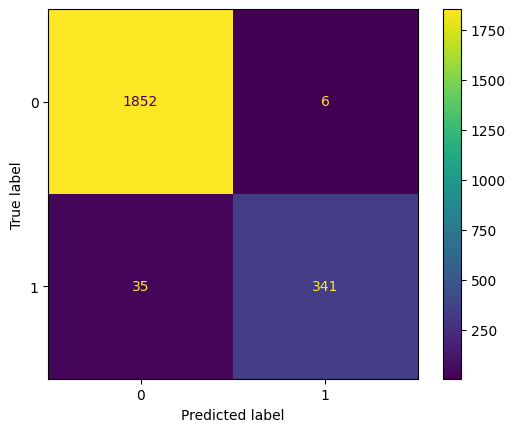

In [125]:
cm = confusion_matrix(y_val,y_pred_val_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [126]:
y_pred_test_rf = rf_cv.best_estimator_.predict(X_test)

In [127]:

target_labels = ['stay', 'left']
print(classification_report(y_test, y_pred_test_rf, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      1857
        left       0.99      0.94      0.96       377

    accuracy                           0.99      2234
   macro avg       0.99      0.97      0.98      2234
weighted avg       0.99      0.99      0.99      2234



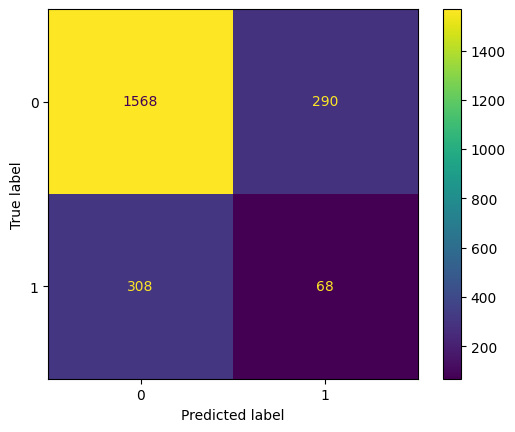

In [128]:
cm = confusion_matrix(y_val,y_pred_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

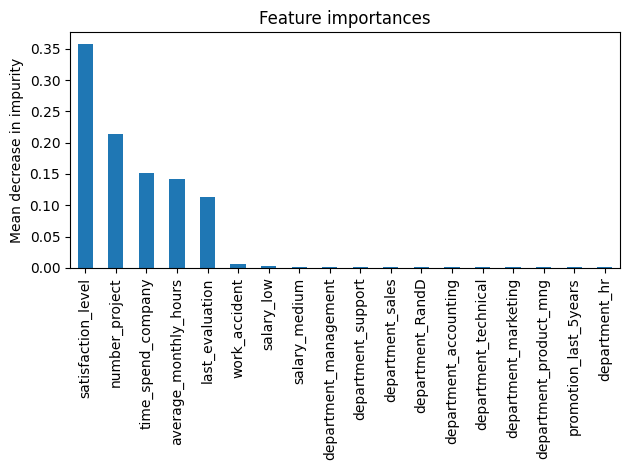

In [129]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [130]:
print('accuracy:',accuracy_score(y_test,y_pred_test_rf))
print('precision:',precision_score(y_test,y_pred_test_rf))
print('recall:',recall_score(y_test,y_pred_test_rf))
print('f1:',f1_score(y_test,y_pred_test_rf))
print('auc:',roc_auc_score(y_test,y_pred_test_rf))
accuracy4 = accuracy_score(y_test, y_pred_test_rf)
precision4 = precision_score(y_test, y_pred_test_rf)
recall4 = recall_score(y_test, y_pred_test_rf)
f1_4 = f1_score(y_test, y_pred_test_rf)
auc4 = roc_auc_score(y_test, y_pred_test_rf)

accuracy: 0.9870188003581021
precision: 0.9860335195530726
recall: 0.9363395225464191
f1: 0.9605442176870748
auc: 0.9668235038687938


## #2 RandomForest + Upsampling

In [131]:
rf_cv2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1',n_jobs = -1,verbose = 1)

In [132]:
# Fit the model on training data

rf_cv2.fit(X_train2, y_train2)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [133]:
rf_cv2.best_score_

0.9912557740762017

In [134]:
rf_cv2.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [135]:
y_pred_val_rf2 = rf_cv2.best_estimator_.predict(X_val2)

In [136]:

target_labels = ['stay', 'left']
print(classification_report(y_val2, y_pred_val_rf2, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      1.00      0.99      1858
        left       0.98      0.90      0.94       376

    accuracy                           0.98      2234
   macro avg       0.98      0.95      0.96      2234
weighted avg       0.98      0.98      0.98      2234



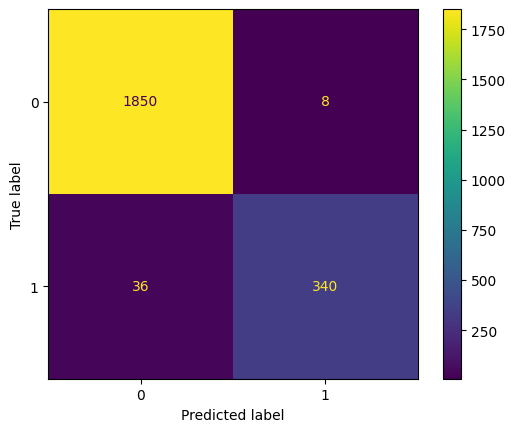

In [137]:
cm = confusion_matrix(y_val2,y_pred_val_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [138]:
y_pred_test_rf2 = rf_cv2.best_estimator_.predict(X_test2)

In [139]:

target_labels = ['stay', 'left']
print(classification_report(y_test2, y_pred_test_rf2, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      1857
        left       0.98      0.94      0.96       377

    accuracy                           0.99      2234
   macro avg       0.98      0.97      0.98      2234
weighted avg       0.99      0.99      0.99      2234



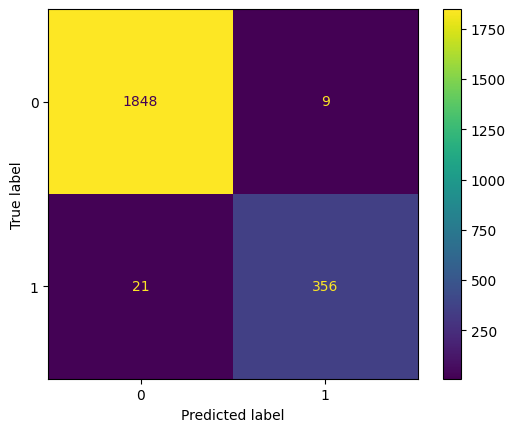

In [140]:
cm = confusion_matrix(y_test2,y_pred_test_rf2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

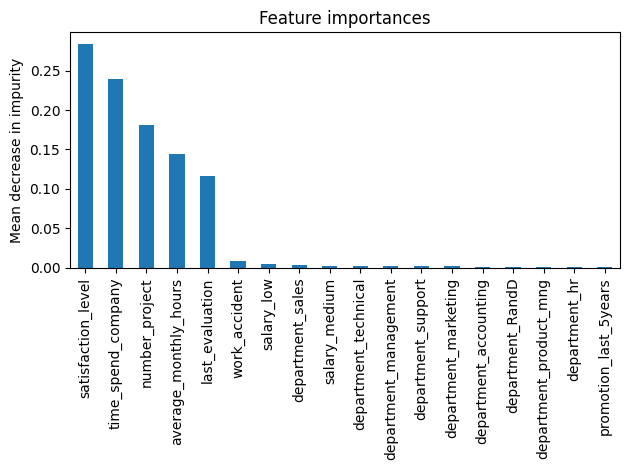

In [141]:
importances = rf_cv2.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test2.columns)
rf_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [142]:
print('accuracy:',accuracy_score(y_test2,y_pred_test_rf2))
print('precision:',precision_score(y_test2,y_pred_test_rf2))
print('recall:',recall_score(y_test2,y_pred_test_rf2))
print('f1:',f1_score(y_test2,y_pred_test_rf2))
print('auc:',roc_auc_score(y_test2,y_pred_test_rf2))
accuracy5 = accuracy_score(y_test2, y_pred_test_rf2)
precision5 = precision_score(y_test2, y_pred_test_rf2)
recall5 = recall_score(y_test2, y_pred_test_rf2)
f1_5 = f1_score(y_test2, y_pred_test_rf2)
auc5 = roc_auc_score(y_test2, y_pred_test_rf2)

accuracy: 0.9865711727842436
precision: 0.9753424657534246
recall: 0.9442970822281167
f1: 0.9595687331536388
auc: 0.9697252777861102


## #3 Random Forest + Tuned Parameters + Upsampled

In [143]:
# Define the hyperparameter grid
cv_params = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']}

# Set up GridSearchCV
rf_cv3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1',n_jobs = -1,verbose = 1)

In [144]:
# Fit the model on training data

rf_cv3.fit(X_train2, y_train2)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [145]:
rf_cv3.best_score_

0.9971275479334297

In [146]:
rf_cv3.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [147]:
y_pred_val_rf3 = rf_cv3.best_estimator_.predict(X_val2)

In [148]:

target_labels = ['stay', 'left']
print(classification_report(y_val2, y_pred_val_rf3, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      1.00      0.99      1858
        left       0.98      0.90      0.94       376

    accuracy                           0.98      2234
   macro avg       0.98      0.95      0.96      2234
weighted avg       0.98      0.98      0.98      2234



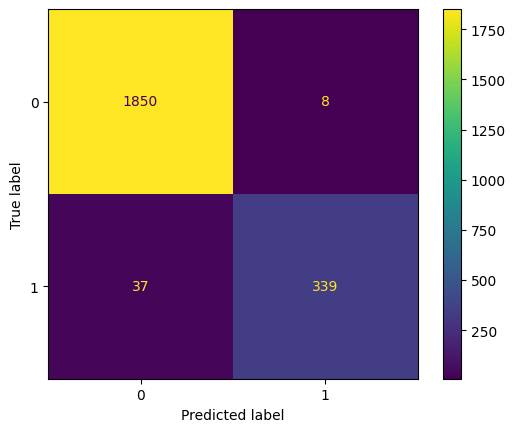

In [149]:
cm = confusion_matrix(y_val2,y_pred_val_rf3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [150]:
y_pred_test_rf3 = rf_cv3.best_estimator_.predict(X_test2)

In [151]:

target_labels = ['stay', 'left']
print(classification_report(y_test2, y_pred_test_rf3, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      1857
        left       0.98      0.94      0.96       377

    accuracy                           0.99      2234
   macro avg       0.98      0.97      0.97      2234
weighted avg       0.99      0.99      0.99      2234



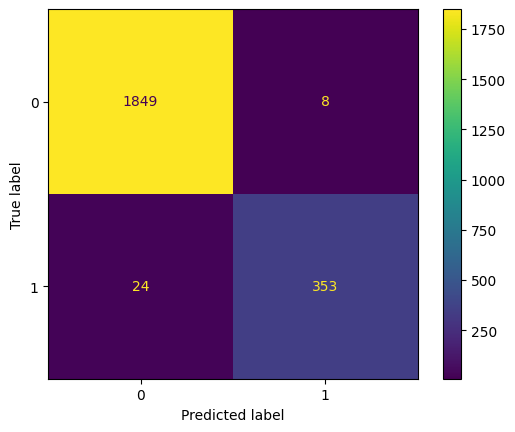

In [152]:
cm = confusion_matrix(y_test2,y_pred_test_rf3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

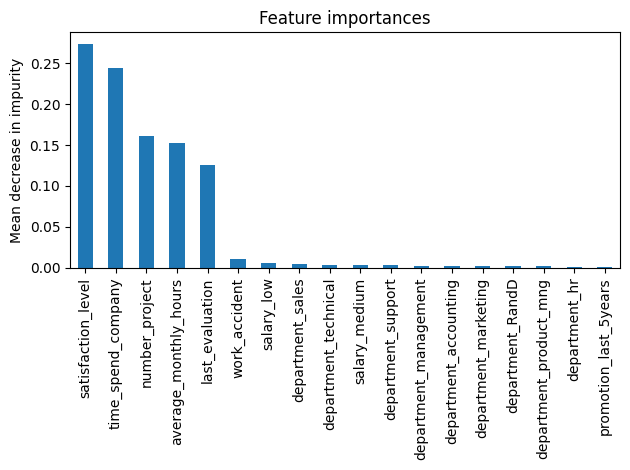

In [153]:
importances = rf_cv3.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test2.columns)
rf_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [154]:
print('accuracy:',accuracy_score(y_test2,y_pred_test_rf3))
print('precision:',precision_score(y_test2,y_pred_test_rf3))
print('recall:',recall_score(y_test2,y_pred_test_rf3))
print('f1:',f1_score(y_test2,y_pred_test_rf3))
print('auc:',roc_auc_score(y_test2,y_pred_test_rf3))
accuracy6 = accuracy_score(y_test2, y_pred_test_rf3)
precision6 = precision_score(y_test2, y_pred_test_rf3)
recall6 = recall_score(y_test2, y_pred_test_rf3)
f1_6 = f1_score(y_test2, y_pred_test_rf3)
auc6 = roc_auc_score(y_test2, y_pred_test_rf3)

accuracy: 0.9856759176365264
precision: 0.9778393351800554
recall: 0.9363395225464191
f1: 0.9566395663956639
auc: 0.9660157494261443


# Logistic Regression

In [155]:
log_clf = LogisticRegression(random_state=0, class_weight='balanced', penalty='l2', C=1.0)


In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_val_scaled = scaler.transform(X_val2)
X_test_scaled = scaler.transform(X_test2)

In [157]:
log_clf.fit(X_train_scaled, y_train2)

# Evaluate on training and validation sets
y_train_pred = log_clf.predict(X_train_scaled)
y_log_val_pred = log_clf.predict(X_val_scaled)

print("Training Accuracy:", accuracy_score(y_train2, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val2, y_log_val_pred))
print("Validation Report:\n", classification_report(y_val2, y_log_val_pred))

# Cross-validation
cv_scores = cross_val_score(log_clf, X_train_scaled, y_train2, cv=5) # 5 fold cross validation.
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Training Accuracy: 0.8596947935368043
Validation Accuracy: 0.8290062667860341
Validation Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      1858
           1       0.50      0.90      0.64       376

    accuracy                           0.83      2234
   macro avg       0.74      0.86      0.76      2234
weighted avg       0.90      0.83      0.85      2234

Cross-Validation Scores: [0.86131059 0.8559246  0.85951526 0.85996409 0.8559246 ]
Mean CV Score: 0.858527827648115


In [158]:
y_log_pred = log_clf.predict(X_test_scaled)

In [159]:
print("Test Accuracy:", accuracy_score(y_test2, y_log_pred))
target_labels = ["stay", "left"]
print(classification_report(y_test2, y_log_pred, target_names=target_labels))

Test Accuracy: 0.8361683079677709
              precision    recall  f1-score   support

        stay       0.98      0.82      0.89      1857
        left       0.51      0.91      0.65       377

    accuracy                           0.84      2234
   macro avg       0.74      0.87      0.77      2234
weighted avg       0.90      0.84      0.85      2234



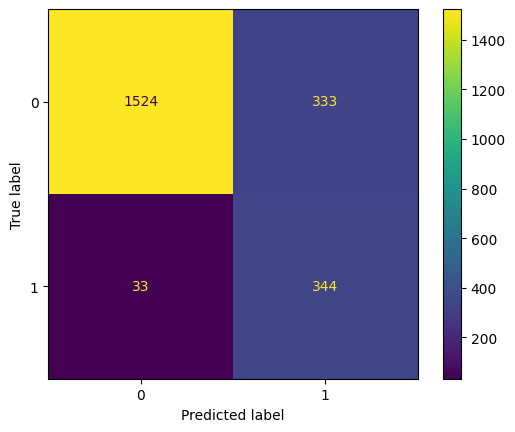

In [160]:
log_cm = confusion_matrix(y_test2,y_log_pred, labels =log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()

In [161]:
print('accuracy:',accuracy_score(y_test2,y_log_pred))
print('precision:',precision_score(y_test2,y_log_pred))
print('recall:',recall_score(y_test2,y_log_pred))
print('f1:',f1_score(y_test2,y_log_pred))
print('auc:',roc_auc_score(y_test2,y_log_pred))
accuracy7 = accuracy_score(y_test2, y_log_pred)
precision7 = precision_score(y_test2, y_log_pred)
recall7 = recall_score(y_test2, y_log_pred)
f1_7 = f1_score(y_test2, y_log_pred)
auc7 = roc_auc_score(y_test2, y_log_pred)

accuracy: 0.8361683079677709
precision: 0.5081240768094535
recall: 0.9124668435013262
f1: 0.6527514231499051
auc: 0.8665726786165759


In [162]:
# Get coefficients
coefficients = pd.DataFrame({'Feature': X_train2.columns, 'Coefficient': log_clf.coef_[0]})

# Print or visualize the coefficients
print(coefficients.sort_values(by='Coefficient', ascending=False))

                   Feature  Coefficient
4       time_spend_company     1.480853
16              salary_low     0.599739
17           salary_medium     0.422070
3    average_monthly_hours     0.129949
10   department_management     0.003407
1          last_evaluation    -0.013595
12  department_product_mng    -0.048915
13        department_sales    -0.053398
9            department_hr    -0.059631
11    department_marketing    -0.066377
14      department_support    -0.076308
8    department_accounting    -0.083371
15    department_technical    -0.098318
7         department_RandD    -0.106262
6    promotion_last_5years    -0.144673
5            work_accident    -0.482423
2           number_project    -0.929022
0       satisfaction_level    -1.469623


## Champion model
Base on model performance the champion model would be base Random Forest (with out upsampling and parameter tuning).

After tested the model that included Satisfaction Level, we can say this factor is play crucial role for employee's decision.

However, Satisfaction Level seemingly not the root cause of the problem, in the other word, it is the result of the problem.

After this I decided to make a new prediction but leaving Satisfaction Level.

And if we exclude a feature it should not effect that much compare to old prediction, but it is worth to try.

Also, Satisfaction Level is depend on emotion than facts, and it is possible that it is change rapidly, it might be better to consider what lead the unsatisfied and satisfied.

## Feature engineering (Selection)

In [163]:
X_train3 = X_train.drop(['satisfaction_level'], axis = 1)
X_val3 = X_val.drop(['satisfaction_level'], axis = 1)
X_test3 = X_test.drop(['satisfaction_level'],axis = 1)

In [164]:
cv_params = {
    'n_estimators': [50,100],  
    'max_depth' : [10,50],
    'min_samples_leaf' : [0.5,1],
    'min_samples_split' : [0.001, 0.01],
    'max_features' : ["sqrt"],
    'max_samples' : [.5,.9]}

rf_cv4 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1',n_jobs = -1,verbose = 1)

In [165]:
rf_cv4.fit(X_train3,y_train[1])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'f1', 'accuracy', 'precision', 'recall'},
             verbose=1)

In [166]:
rf_cv4.best_score_

0.9207421020046678

In [167]:
rf_cv4.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [168]:
y_pred_val_rf4= rf_cv4.best_estimator_.predict(X_val3)

In [169]:

target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred_val_rf4, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      0.99      0.98      1858
        left       0.94      0.90      0.92       376

    accuracy                           0.97      2234
   macro avg       0.96      0.95      0.95      2234
weighted avg       0.97      0.97      0.97      2234



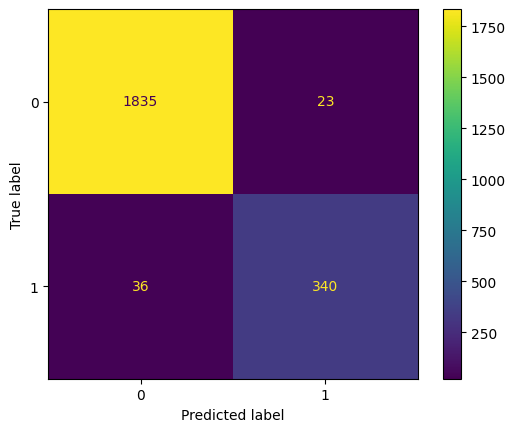

In [170]:
cm = confusion_matrix(y_val,y_pred_val_rf4)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

In [171]:
y_pred_test_rf4 = rf_cv4.best_estimator_.predict(X_test3)

In [172]:

target_labels = ['stay', 'left']
print(classification_report(y_val, y_pred_val_rf4, target_names=target_labels))

              precision    recall  f1-score   support

        stay       0.98      0.99      0.98      1858
        left       0.94      0.90      0.92       376

    accuracy                           0.97      2234
   macro avg       0.96      0.95      0.95      2234
weighted avg       0.97      0.97      0.97      2234



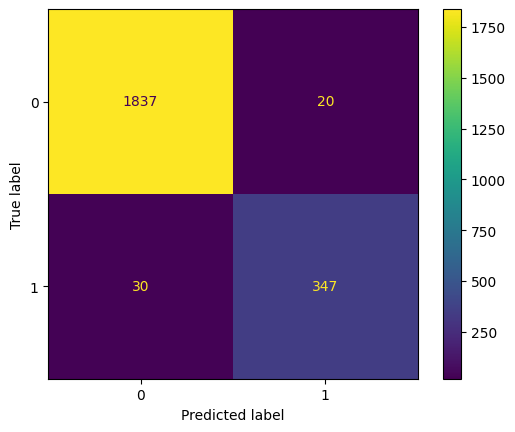

In [173]:
cm = confusion_matrix(y_test,y_pred_test_rf4)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
disp.plot()

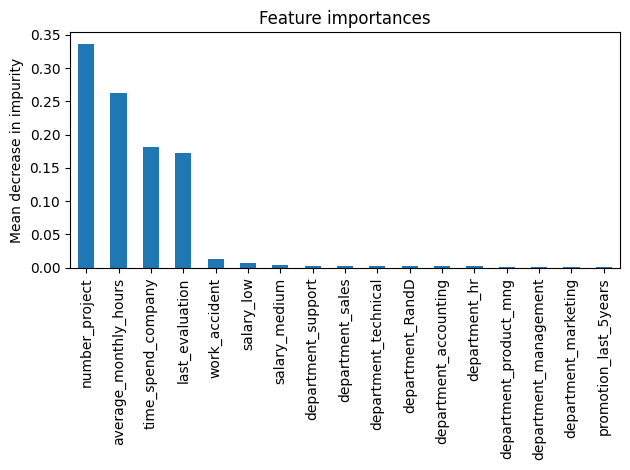

In [174]:
importances = rf_cv4.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test3.columns)
rf_importances.sort_values(ascending = False,inplace =True)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [175]:
print('accuracy:',accuracy_score(y_test,y_pred_test_rf4))
print('precision:',precision_score(y_test,y_pred_test_rf4))
print('recall:',recall_score(y_test,y_pred_test_rf4))
print('f1:',f1_score(y_test,y_pred_test_rf4))
print('auc:',roc_auc_score(y_test,y_pred_test_rf4))
accuracy8 = accuracy_score(y_test,y_pred_test_rf4)
precision8 = precision_score(y_test,y_pred_test_rf4)
recall8 = recall_score(y_test,y_pred_test_rf4)
f1_8 = f1_score(y_test,y_pred_test_rf4)
auc8 = roc_auc_score(y_test,y_pred_test_rf4)

accuracy: 0.9776186213070726
precision: 0.9455040871934605
recall: 0.9204244031830239
f1: 0.9327956989247311
auc: 0.9548271719738491


As the analysis suggest, the last model is also suggest that number project play a crucial role as a main factor and root cause of the problem.

Because when the number project is increased -> average monthly hours is increased -> last evaluation is higher -> satisfaction is lower (overwork)-> when time spent, employees seek for the growth, because they think it is not worth it as they see there are only a few person get promoted and salary increased.

In the other hand, if number project is too low -> average monthly hours decreaseed -> employees disengaged (underwork) -> evaluation score is lower -> satisfaction score is lower -> when time spent, employees seek for the growth.

***Note: The chronological distribution may not be completely accurate, but it is intended to make it easier for readers to follow.***

#  Conclusion


## Score Comparison

In [176]:
results = pd.DataFrame({
    'Model': ['XGBoost', 'XGBoost + Upsampled', 'XGBoost + Tuned Parameters + Upsampled',
              'Random Forest', 'Random Forest + Upsampled', 'Random Forest + Tuned Parameters + Upsampled',
              'Logistic Regression','Random Forest (Selection)'],
    'Accuracy': [accuracy, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8],
    'Precision': [precision, precision2, precision3, precision4, precision5, precision6, precision7,precision8],
    'Recall': [recall, recall2, recall3, recall4, recall5, recall6, recall7,recall8],
    'F1': [f1, f12, f1_3, f1_4, f1_5, f1_6, f1_7,f1_8],
    'AUC': [auc, auc2, auc3, auc4, auc5, auc6, auc7,auc8]
})
results

Model  Accuracy  Precision  \
0                                       XGBoost  0.985676   0.975207   
1                           XGBoost + Upsampled  0.981647   0.944444   
2        XGBoost + Tuned Parameters + Upsampled  0.985676   0.960000   
3                                 Random Forest  0.987019   0.986034   
4                     Random Forest + Upsampled  0.986571   0.975342   
5  Random Forest + Tuned Parameters + Upsampled  0.985676   0.977839   
6                           Logistic Regression  0.836168   0.508124   
7                     Random Forest (Selection)  0.977619   0.945504   

     Recall        F1       AUC  
0  0.938992  0.956757  0.967073  
1  0.946950  0.945695  0.967821  
2  0.954907  0.957447  0.973415  
3  0.936340  0.960544  0.966824  
4  0.944297  0.959569  0.969725  
5  0.936340  0.956640  0.966016  
6  0.912467  0.652751  0.866573  
7  0.920424  0.932796  0.954827

**Model Select Suggestion**
Because there is a champion model with the highest score compare with the feature engineered model.

I suggest that the HR need to consider the pros and cons:

Champion model:
Perform better with higher score, however this model is included satisfaction level which is not the root cause of the problem. Then this model is work best when used with the datasets that contain satisfaction level(if this feature is collected before employee leave).

The last model:
Even this model's score is worse but this model is really robust without satisfaction score. Then this model will work best with the datasets that are not contain satisfaction level. It is mean this model is good to predict the leaving of employees by it root cause.

In [177]:

import plotly.express as px
from ipywidgets import interact, Dropdown, IntSlider, FloatSlider


# --- 1️⃣ Interactive Feature Exploration ---
@interact(
    x_feature=['average_monthly_hours', 'number_project', 'time_spend_company', 'last_evaluation'],
    color_by=['salary', 'department', 'promotion_last_5years']
)
def explore_data(x_feature, color_by):
    fig = px.histogram(
        data_filtered,
        x=x_feature,
        color=color_by,
        barmode='overlay',
        facet_col='left',
        title=f"{x_feature.replace('_', ' ').title()} Distribution by {color_by.title()} and Churn Status",
        opacity=0.7
    )
    fig.update_layout(bargap=0.2, legend_title_text=color_by.title())
    fig.show()


# --- 2️⃣ Interactive Employee Churn Simulation ---
model_features = rf_cv.feature_names_in_

def predict_employee_churn(
    average_monthly_hours=160,
    number_project=4,
    time_spend_company=3,
    last_evaluation=0.7,
    salary='medium',
    department='sales',
    promotion_last_5years=0,
    work_accident=0
):
    # Create an empty row for prediction
    sample = pd.DataFrame(np.zeros((1, len(model_features))), columns=model_features)

    # Assign numeric inputs
    for col in sample.columns:
        if 'average_monthly_hours' in col:
            sample[col] = average_monthly_hours
        elif 'number_project' in col:
            sample[col] = number_project
        elif 'time_spend_company' in col:
            sample[col] = time_spend_company
        elif 'last_evaluation' in col:
            sample[col] = last_evaluation
        elif 'promotion_last_5years' in col:
            sample[col] = promotion_last_5years
        elif 'work_accident' in col:
            sample[col] = work_accident
        elif f'salary_{salary}' == col:
            sample[col] = 1
        elif f'department_{department}' == col:
            sample[col] = 1

    # Predict churn probability
    prob = rf_cv.predict_proba(sample)[0][1]

    # Interpret result
    if prob >= 0.5:
        outcome = "🚨 Likely to Leave"
    else:
        outcome = "✅ Likely to Stay"

    print(f"Predicted Churn Probability: {prob:.1%}")
    print(f"Prediction: {outcome}")

# --- Interactive Controls ---
interact(
    predict_employee_churn,
    average_monthly_hours=IntSlider(min=80, max=320, step=10, value=160, description='Avg Hours'),
    number_project=IntSlider(min=1, max=10, step=1, value=4, description='Projects'),
    time_spend_company=IntSlider(min=1, max=10, step=1, value=3, description='Years at Company'),
    last_evaluation=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.7, description='Evaluation'),
    salary=Dropdown(options=sorted(data_filtered['salary'].unique()), value='medium', description='Salary'),
    department=Dropdown(options=sorted(data_filtered['department'].unique()), value='sales', description='Department'),
    promotion_last_5years=Dropdown(options=[0, 1], value=0, description='Promotion (5yrs)'),
    work_accident=Dropdown(options=[0, 1], value=0, description='Accident'),
);


interactive(children=(Dropdown(description='x_feature', options=('average_monthly_hours', 'number_project', 't…

interactive(children=(IntSlider(value=160, description='Avg Hours', max=320, min=80, step=10), IntSlider(value…

### Limitations and Further Considerations: Contextualizing the Analysis

While this analysis provides robust insights and actionable recommendations, it's crucial to acknowledge its inherent limitations and areas for further exploration:

Dataset Scope and Temporal Coverage: This analysis is based on a specific dataset from Salifort Motors. The generalizability of these findings to other time periods or organizational contexts, even within Salifort Motors in the future, should be continuously validated as organizational dynamics and external factors evolve. The dataset’s time frame is also static; understanding trends over time would require longitudinal data.

Feature Set Limitations: The analysis is limited by the features included in the provided dataset. Crucial factors not explicitly captured but potentially impacting employee turnover may include:

Detailed Job Role Characteristics: Nuances within departments – specific job roles, responsibilities, and inherent stressors within those roles – could be more granular drivers than just department affiliation.

Work Environment and Culture (Beyond Satisfaction Surveys): Qualitative aspects of team dynamics, management styles, organizational culture beyond measured "satisfaction," and specific workplace conditions (physical environment, resources available) could play significant roles.

External Factors: Broader economic conditions, industry trends, competitor compensation and benefits packages, local labor market dynamics, and even geographical location factors influencing employee mobility are not included but can significantly impact turnover.

Employee Demographics Beyond Available Features: While 'department' is included, more detailed demographic data (e.g., age cohorts, specific diversity dimensions beyond department within demographic groupings, employee life stages) could reveal further nuanced patterns in attrition.

Satisfaction as a Proxy, Not Root Cause (Reiterated): As emphasized, while Satisfaction Level is a powerful predictor, it is a proxy indicator of deeper underlying issues. The recommendations are designed to address these root causes (workload, compensation, career progression, etc.) that drive satisfaction. Future qualitative research must continue to probe the specific drivers of satisfaction and dissatisfaction within Salifort Motors’ context.



## Summary

The core narrative revolves around a **failure to sustain employee satisfaction and engagement beyond the initial years of employment.** 

Salifort Motors appears to be experiencing a turnover lifecycle concentrated in years 3-5, driven by a confluence of factors: declining satisfaction after year 2, potential workload imbalances shifting from possible underutilization to overload around years 3-5, perceptions of limited salary progression particularly for longer-tenured staff, restricted and unevenly distributed promotion opportunities, and a dual attrition challenge losing both high-performing individuals likely due to burnout/lack of advancement and potentially under-engaged lower performers. While departmental turnover rates vary, the underlying issues are likely company-wide. Work accidents, while not directly causing turnover, serve as a stark reminder of the pressures associated with workload.

Addressing this multi-faceted challenge requires a holistic approach focusing on:

**enhancing employee satisfaction measurement and action planning, re-evaluating workload distribution and management across employee tenure, optimizing compensation structures with a focus on progression and equity, improving promotion processes for transparency and fairness, investing in employee well-being and safety to reduce workload-related risks, and implementing targeted initiatives, especially in departments with elevated turnover rates, while always addressing the systemic, company-wide issues as the foundational priority.**



### Feature Importance as a Strategic Compass for HR Action:


The analysis of feature importance further amplifies the business relevance of the findings. The consistently top-ranked features across models act as a strategic compass, guiding Salifort Motors HR to prioritize their interventions effectively:

**Satisfaction Level:** Universally the most dominant predictor. This unequivocally highlights improving employee satisfaction as the primary lever for retention.

**Time Spent at Company:** Consistently high importance. This reinforces the critical need to address the negative trajectory of employee experience after the initial 2-year period, focusing on the vulnerable mid-tenure segment (years 3-5).

**Number of Projects:** A consistently significant factor. This underscores the importance of optimizing workload management to prevent both under-engagement and burnout stemming from imbalanced project allocation, particularly across employee tenure stages.

**Last Evaluation:** Regularly emerges as a predictor. This emphasizes that attrition is not simply a matter of poor performance; Salifort Motors risks losing both underperforming and high-performing employees, necessitating tailored retention strategies for diverse performance segments.

**Average Monthly Hours:** Consistently important, working in conjunction with Number of Projects. This reinforces the need to manage overall workload intensity and ensure sustainable working hours, preventing burnout and promoting work-life balance.

***Note: The (sometimes secondary, depending on model type) importance of Salary, when considered(The plots), further emphasizes the role of competitive compensation and fair salary progression as foundational elements of employee retention.***


## Insights


**Analysis of Salifort Motors Employee Turnover: Key Insights**
This analysis aims to uncover the primary drivers of employee turnover at Salifort Motors and provide actionable insights for the HR department to address this critical issue. Through extensive exploratory data analysis and predictive modeling, several key themes and interconnected factors have emerged as significant contributors to employee attrition.

**1. Core Driver: Employee Satisfaction & the Mid-Tenure Satisfaction Dip**
A central finding is the paramount importance of employee satisfaction as a predictor of attrition. The analysis strongly indicates that low satisfaction levels are a critical signal for potential employee departure.
Specifically, employees who leave Salifort Motors exhibit markedly lower satisfaction scores, typically clustered in the 0.0 - 0.45 range. This sharply contrasts with employees who remain, whose satisfaction levels generally fall within the 0.6 - 0.8 range. This stark difference establishes a clear satisfaction threshold; below this level, the risk of turnover escalates significantly.
Crucially, temporal analysis reveals a concerning trend: employee satisfaction experiences a notable decline as tenure increases. While satisfaction levels are relatively robust in the initial two years of employment, a pronounced drop occurs at the three-year mark and deepens further in the fourth year. This dip in satisfaction directly coincides with the years identified as peak turnover periods (years 3, 4, and 5). This correlation suggests underlying factors within the company's environment, culture, or employee experience systematically erode satisfaction after the initial two-year period.
While departmental average satisfaction levels may appear similar, examination within each department confirms that departing employees consistently exhibit these lower satisfaction scores. This implies the satisfaction challenge is not confined to specific departments but represents a company-wide issue manifesting across the organization.

**Insight #1: Low employee satisfaction, particularly developing after the first two years of employment, is identified as a primary driver of employee turnover at Salifort Motors. Monitoring and actively managing employee satisfaction, especially beyond the initial tenure, is crucial for retention.**

**2. Workload Dynamics: Imbalance Over Time and Impact on Performance Groups**
Workload emerges as a significant, albeit complex, factor influencing employee turnover. The analysis reveals not simply the quantity of work, but critically the distribution and perception of workload over time as key considerations.
Two distinct employee groups are identified among those who leave, characterized by their workload and performance profiles:
* The Underutilized Group: A segment of departing employees worked comparatively fewer hours per month (125-160 hours) and received lower evaluation scores (0.45-0.58), coupled with lower satisfaction levels (0.35-0.45). This group may be departing due to perceived lack of challenging assignments, feelings of undervaluation, or limited career growth if their lower performance is a consequence of disengagement from insufficient stimulation in their roles.
* The Overburdened Group: Conversely, another significant segment of leavers worked excessively long hours (220-320 hours per month), received high evaluation scores (0.8-1.0), yet reported extremely low satisfaction levels (near 0). These employees are likely experiencing burnout from consistent overwork, feeling under-appreciated despite high performance and contribution, or seeking environments with more sustainable workload expectations.
Further analysis of "Time Spent Company vs. Average Monthly Hours" reveals a concerning pattern of workload evolution with tenure. Average monthly hours actually decrease from year 2 to year 3 (reaching their lowest point), followed by a rise in years 4 and 5 (reaching their highest). This temporal shift suggests a potential issue with workload balance across employee tenure. Employees may perceive an initial period of underutilization, followed by an unsustainable workload increase as they progress in their careers at Salifort Motors.
Supporting this, examination of "Time Spent vs. Number of Projects" tentatively points towards a project load imbalance. While employees at the 3-year mark undertake the highest number of total projects, the proportion of employees handling a very low number of projects (specifically 2 projects) is comparatively higher than at year 2. Conversely, years 4 and 5 demonstrate a relative increase in employees assigned a high number of projects (5 or more). This may corroborate the idea of a workload recalibration issue where initial tenure could be characterized by under-engagement followed by overload.
Moreover, the correlation between increased project load, higher average monthly hours, and elevated work accident rates strongly implies that mounting workload can induce significant pressure and potential physical risk.

**Insight #2: Workload is not simply a matter of excessive hours leading to turnover, but potentially an imbalanced workload progression over employee tenure. The data suggests a shift from possible underutilization in initial years to potential overload and burnout around years 3-5, negatively impacting both underperforming and high-performing employees. High workload is also associated with increased work accident risk, raising employee well-being concerns.**

**3. Time-in-Company Lifecycle & the Critical Years 3-5**
The duration of employment at Salifort Motors exhibits a clear relationship with employee attrition. "Time Spend Company by Left" data decisively establishes years 3, 4, and 5 as the peak turnover window. Year 5 stands out particularly, with the proportion of employees leaving and staying reaching near parity.
Interestingly, year 2 represents an anomaly with the lowest observed turnover rate. This may correspond to an initial period of onboarding, acclimation, and potentially inflated early-career enthusiasm often termed the "honeymoon phase."
This turnover lifecycle pattern directly aligns with the aforementioned trends in satisfaction and workload, underscoring that time spent at the company is not an independent variable but intimately linked to the evolving employee experience as reflected in satisfaction and workload perceptions.

**Insight #3: Employee turnover at Salifort Motors follows a distinct lifecycle pattern, with attrition dramatically escalating after the initial two years of employment, peaking between years 3 and 5. This lifecycle indicates systemic challenges occurring within this mid-tenure timeframe, rendering employees with 3-5 years of service particularly vulnerable to attrition.**

**4. Compensation: Salary Levels, Progression, and Perceived Equity**
Compensation, specifically salary, emerges as a demonstrably significant factor influencing employee retention. Analysis unequivocally shows that lower salary levels correlate with markedly higher turnover rates. Conversely, employees in higher salary brackets exhibit a substantially lower propensity to leave Salifort Motors.
Furthermore, examination of "Salary Proportion Over Time in Company" suggests a potential issue with salary progression or stagnation over tenure. The proportion of employees in the low salary band noticeably increases at year 5, concurrent with a sharp decrease in the proportion within the high salary band. This pattern raises concerns about limited upward salary mobility for employees with longer tenure. If high-performing, tenured employees perceive their salary growth as failing to adequately reflect their contribution or market value over time, it can become a powerful push factor for attrition, particularly in the critical years 3-5.
The data also reveals a link between salary and promotions. Promoted employees are significantly more likely to be in medium and high salary brackets compared to non-promoted colleagues. This highlights the role of promotions as a tangible mechanism for salary advancement and potentially a key element in fostering employee retention by providing visible pathways for compensation growth.

**Insight #4: Salary level is a critical factor influencing attrition, with lower salary bands demonstrating significantly higher turnover rates. Concerns exist regarding salary progression for employees beyond the initial years, potentially leading to dissatisfaction among longer-tenured staff, especially in relation to increasing workloads and performance expectations. Promotions are associated with higher salary levels and may be crucial for perceived compensation fairness and retention.**

**5. Performance Evaluation: Turnover at Both Ends of the Spectrum**
Analyzing "Last Evaluation vs. Left" reveals a nuanced understanding of performance and attrition. Employees departing Salifort Motors are not exclusively lower performers; attrition is observed at both ends of the performance spectrum:
* High-Performing Leavers (0.8 - 1.0 Evaluation): A notable proportion of employees with high evaluation scores are leaving the company. These individuals may be seeking external opportunities that more effectively recognize and reward their high performance, potentially feel burnt out or undervalued given the workload analysis, or perceive a lack of internal advancement pathways despite their consistent high achievement.
* Lower-Performing Leavers (0.4 - 0.6 Evaluation): Consistent with expectations, employees with lower evaluation scores are also represented among those who leave. These departures might be attributed to disengagement, lack of necessary support for performance improvement, or proactive career changes in anticipation of potential performance management actions.
* Stable Mid-Range Performers (0.6 - 0.8 Evaluation): Employees with evaluation scores in the mid-range are more likely to remain at Salifort Motors. This suggests that the "average" employee experience may be comparatively more stable and satisfactory, or that this performance range represents a comfortable balance of expectations and workload within the current organizational structure.
The contrasting evaluation score distributions between stayers (more evenly distributed) and leavers (skewed toward extremes) further underscores this two-pronged nature of performance-related attrition.

**Insight #5: Employee turnover at Salifort Motors is not solely a matter of losing underperforming staff. The company is experiencing attrition among both high and low performers. This dual attrition pattern indicates distinct underlying challenges impacting different performance segments of the workforce. Addressing both the needs of high-achieving employees (recognition, career growth, sustainable workload) and under-engaged employees (development, support, engagement) is critical.**

**6. Promotion Opportunities: Scarcity and Departmental Disparities**
Overall, promotion rates at Salifort Motors are demonstrably low, with only a minimal percentage of employees receiving promotions within a five-year timeframe. This scarcity of upward mobility can contribute to employee frustration, particularly among ambitious high performers seeking career progression. A perception of limited career growth potential within the company can be a contributing factor to attrition, particularly in mid-tenure when employees may be assessing their long-term career prospects.
Furthermore, promotion opportunities appear to be unevenly distributed across departments. Certain departments (e.g., Management, R&D, Marketing) exhibit noticeably higher promotion rates than others (e.g., IT, Support, Technical, Product Management). This disparity could breed a sense of inequity, particularly within departments perceived as having fewer career advancement prospects. Employees in these departments might experience reduced motivation and increased likelihood of seeking opportunities elsewhere, particularly if they believe departmental promotion structures are unfairly limiting their career trajectories.
While individual promotion status may not be the sole determinant of leaving, the systemic lack of promotion opportunities and their uneven distribution can act as significant contributing factors to overall employee dissatisfaction and subsequent attrition.

**Insight #6: Promotion opportunities at Salifort Motors are both limited in number and unevenly distributed across departments. This scarcity and inequity in promotions can foster a perception of restricted career growth and unfair advancement prospects, contributing to employee dissatisfaction and attrition, particularly impacting ambitious employees and those in departments with limited upward mobility.**

**7. Departmental Turnover Rates: Variation Without Being the Root Cause**
Analysis reveals notable variations in employee turnover rates across different departments within Salifort Motors. Departments such as HR, Accounting, Sales, and Technical exhibit the highest proportions of departing employees, while departments like R&D demonstrate comparatively lower attrition.
While these departmental differences are statistically significant and valuable for targeted interventions, it is important to note that department itself is unlikely to be the fundamental root cause of the widespread turnover problem. As established earlier, core issues such as declining satisfaction over tenure and potential workload imbalances are observed consistently across departments among employees who leave.
It is more probable that departmental variations in turnover rates are symptoms or amplifications of broader, company-wide issues interacting with specific departmental characteristics. Factors such as departmental management styles, team culture, specific job demands within each department, or even varying levels of resources and support could exacerbate or mitigate the impact of company-wide issues like workload stress and limited career progression, leading to the observed departmental differences in attrition rates.
Therefore, while departmental turnover data highlights areas requiring focused attention, addressing the underlying, systemic issues impacting satisfaction, workload, compensation, and career progression across the entire organization is paramount. Department-specific initiatives should complement and build upon these broader organizational improvements to achieve sustainable reductions in turnover.

**Insight #7: Employee turnover rates demonstrate statistically significant variation across departments, with some departments exhibiting considerably higher attrition than others. While departmental turnover rates are important for targeted intervention, they are likely not the primary root cause. Broader, company-wide factors impacting employee satisfaction, workload, compensation, and career progression are more fundamental drivers, with departmental conditions potentially exacerbating or mitigating their impact. Addressing systemic organizational issues while tailoring departmental responses is likely the most effective approach.**

**8. Work Accidents: Symptom of Pressure, Not Direct Driver of Turnover (Paradox Explained)**
The analysis of work accidents presents a seemingly paradoxical finding. Employees who have experienced a work accident demonstrate a lower likelihood of leaving Salifort Motors compared to those who have not. This initially counterintuitive result requires careful interpretation.
Crucially, the data does confirm a positive correlation between increased project load and average monthly working hours and a higher incidence of work accidents. This clearly indicates that greater workload and longer working hours contribute to a heightened risk of accidents, reflecting potential pressures on employees and potentially highlighting areas for improvement in workplace safety protocols and workload management practices.
The lower turnover rate among employees who have had accidents is not to be interpreted as accidents being beneficial or positive for retention. Instead, potential explanations for this counterintuitive finding warrant further qualitative investigation:
* Possible Selection Bias: It's plausible that employees in roles inherently carrying higher workload and potentially higher accident risk (e.g., certain technical or support roles within manufacturing contexts if applicable - though dataset context is HR, consider broadly within 'motor industry' related functions) might be systematically less inclined to leave regardless of accident occurrence. Job roles themselves may attract or retain individuals with different turnover propensities.
* Post-Accident Support and Company Response: It is conceivable that Salifort Motors provides robust support to employees after a work accident occurs. Effective and caring post-accident procedures, compensation, and reintegration programs could, paradoxically, foster increased employee loyalty among those directly experiencing such incidents. (While potentially contributing to retention, this does not negate the need to prevent accidents proactively).
* Accident as a Catalyst for Change (Employee or Company Initiated): In some cases, a work accident could serve as a critical juncture prompting either the employee or the company (or both) to reassess workload, safety procedures, and work conditions. Such reassessment and subsequent adjustments, whether driven by the employee's needs or company action, could, in certain scenarios, inadvertently contribute to improved conditions or renewed employee commitment, potentially influencing retention in a subset of these cases. (Again, prevention is superior to reactive measures).

**Insight #8: Work accidents themselves are not a direct cause of increased employee turnover. In fact, employees with a history of work accidents exhibit a slightly lower turnover rate. However, this should not minimize the importance of accident prevention. Work accidents are demonstrably linked to high workload and working hours, serving as a symptom of workload pressures and a significant concern for employee well-being and workplace safety. Addressing workload management to reduce accident risk remains a crucial priority for Salifort Motors, independent of the paradoxical statistical relationship with turnover.**


## Recommendations

**Recommendations for Salifort Motors to Address Employee Turnover**
Based on the preceding analysis, Salifort Motors is facing a multi-faceted employee turnover challenge, primarily driven by declining satisfaction and related factors as employee tenure increases. To effectively address this, a comprehensive and integrated approach is needed, encompassing the following key recommendation areas:
1. Proactively Measure, Understand, and Act on Employee Satisfaction:
* Implement a Robust Employee Satisfaction Measurement System:
    * Regular Pulse Surveys: Move beyond annual surveys to more frequent "pulse" surveys (e.g., quarterly or bi-annually). These shorter, focused surveys can track satisfaction trends more dynamically and identify emerging issues promptly.
    * Targeted Lifecycle Surveys: Implement satisfaction surveys specifically designed for different tenure milestones (e.g., 6-month, 1-year, 2-year, 3-year, 4-year, 5-year). This will allow for precise tracking of the satisfaction dip identified around years 3 and 4.
    * Exit Interviews Enhancement: Standardize and deepen exit interviews. Go beyond basic questionnaires and conduct structured interviews to understand the specific reasons behind voluntary departures. Actively analyze exit interview data for recurring themes and dissatisfaction drivers.
    * Department-Specific Satisfaction Deep Dives: In departments with higher turnover rates (HR, Accounting, Sales, Technical), conduct more in-depth qualitative assessments (focus groups, manager interviews) to understand department-specific satisfaction challenges.
* Analyze Satisfaction Data for Actionable Insights:
    * Track Trends Over Time and Tenure: Rigorously monitor satisfaction scores and trends, paying particular attention to the decline observed after year 2. Segment satisfaction data by tenure, department, performance level, and other relevant demographics to identify specific pain points.
    * Correlate Satisfaction with Turnover Data: Establish a direct link between satisfaction scores and turnover rates. Use predictive analytics (potentially even based on models) to identify employees at high risk of leaving based on their satisfaction profiles.
    * Identify Key Drivers of Dissatisfaction: Analyze survey data to pinpoint the specific factors contributing to low satisfaction (workload, compensation, career opportunities, management, work-life balance, etc.). Use open-ended survey questions and qualitative feedback to uncover less quantifiable, but equally important, drivers of dissatisfaction.
* Develop and Implement Action Plans Based on Satisfaction Feedback:
    * Accountability for Satisfaction Improvement: Assign clear ownership and accountability to department heads and managers for improving employee satisfaction within their teams.
    * Transparency and Communication: Communicate survey results and action plans to employees transparently. Demonstrate that feedback is taken seriously and is driving meaningful change.
    * Track Progress of Action Plans: Regularly monitor the implementation and impact of action plans on satisfaction scores and, ultimately, turnover rates.
2. Optimize Workload Management and Ensure Balanced Work Distribution:
* Workload Assessment and Redesign:
    * Role-Based Workload Analysis: Conduct a detailed analysis of workload expectations for different roles and tenure levels, particularly focusing on the identified transitions around year 3-5. Are job descriptions and performance expectations accurately reflecting the workload demands?
    * Project Portfolio Management Implementation: Introduce or enhance project portfolio management practices to better allocate projects, manage resource capacity, and prevent overload on individuals and teams, especially as tenure increases.
    * Workload Balancing Tools and Training for Managers: Equip managers with tools and training to effectively distribute workload, monitor employee capacity, and identify signs of burnout or underutilization.
* Address Potential Underutilization in Early Tenure (Years 1-2):
    * Enhanced Onboarding and Initial Skill Development: Ensure onboarding programs are designed to rapidly integrate new employees and provide sufficient initial training to enable them to contribute meaningfully from an earlier stage.
    * Mentorship and Early Responsibility Programs: Implement mentorship programs to support new employees and consider structured programs that progressively increase responsibilities and project ownership within the first two years, addressing potential under-engagement.
* Mitigate Overload Risk in Mid-to-Later Tenure (Years 3-5+):
    * Workload Smoothing and Prioritization Strategies: Train managers on strategies for workload prioritization, delegation, and project phasing to avoid peak workload periods, especially during years 3-5 and beyond.
    * Resource Augmentation Strategies: Explore options for flexible staffing or resource augmentation (contractors, temporary staff) to manage peak workload demands without consistently overburdening permanent employees.
    * Proactive Burnout Prevention Programs: Develop programs and resources focused on burnout prevention, stress management, and employee well-being, especially targeting employees with longer tenure and high workload roles.
* Promote Work-Life Balance and Healthy Work Habits:
    * Encourage Realistic Working Hours: Reinforce a culture that values productivity and efficiency during standard work hours and discourages consistent excessive overtime.
    * Flexible Work Arrangements: Explore and expand options for flexible work arrangements (remote work, flextime, compressed workweeks) where feasible to improve work-life integration and reduce burnout.
    * Vacation and Time-Off Encouragement: Actively encourage employees to utilize their vacation time and sick leave. Model healthy time-off practices from leadership levels.
3. Enhance Compensation and Implement Performance-Based Recognition Programs:
* Competitive Salary Benchmarking and Adjustment:
    * Comprehensive Salary Review: Conduct a thorough salary benchmarking study to ensure compensation levels are competitive within the motor industry and geographic location, particularly for mid-tenure roles (years 3-5 and beyond).
    * Salary Band Adjustments: Based on benchmarking, adjust salary bands to ensure competitiveness and address any identified pay gaps, particularly in roles with higher turnover rates or those held by mid-tenure employees.
    * Pay Equity Audit: Conduct a pay equity audit to ensure fair and equitable compensation across genders, ethnicities, and other protected groups, building trust in the fairness of the compensation system.
* Transparent Salary Progression and Merit-Based Increases:
    * Clearly Defined Salary Bands and Progression Paths: Communicate clear salary bands and salary progression criteria for each role and tenure level, allowing employees to understand their earning potential and how to advance.
    * Merit-Based Pay Increases and Bonuses: Ensure performance evaluations directly translate into meaningful merit-based salary increases and bonus opportunities. Reward high performance consistently and visibly.
* Beyond Monetary Compensation - Holistic Recognition and Appreciation:
    * Formal and Informal Recognition Programs: Implement a range of formal and informal recognition programs to acknowledge employee contributions beyond just monetary rewards (employee of the month, team recognition awards, public acknowledgments, "thank you" programs).
    * Values-Based Recognition: Tie recognition to company values, reinforcing desired behaviors and contributions.
    * Manager Training on Appreciation: Train managers to regularly provide positive feedback, express appreciation for their team's work, and create a culture of recognition.
4. Expand Promotion Opportunities and Create Clear Career Development Pathways:
* Increase Promotion Transparency and Accessibility:
    * Open Promotion Processes: Ensure promotion processes are transparent, well-defined, and communicated clearly to all employees. Post internal job openings widely and encourage internal applications.
    * Skills-Based Promotion Criteria: Clearly define the skills and competencies required for promotions and communicate these criteria transparently.
    * Reduce Promotion Bias: Review promotion processes for potential biases and implement measures to ensure fair and objective evaluations of candidates, across all departments.
* Expand Internal Promotion Pathways:
    * Career Path Development: Develop clear career paths within each department and function, outlining potential progression steps, required skills, and timelines.
    * Lateral Development Opportunities: In addition to vertical promotions, create opportunities for lateral career moves and skill diversification within the organization, particularly in departments with limited upward hierarchical structures.
    * Succession Planning Programs: Implement robust succession planning programs to identify high-potential employees early and provide them with targeted development opportunities to prepare them for future leadership roles, signaling commitment to internal growth.
* Invest in Employee Development and Skill Enhancement:
    * Training and Development Budget Increase: Increase the budget allocated to employee training and development programs.
    * Skills Gap Analysis and Targeted Training: Conduct skills gap analyses across departments and tenure levels to identify key skill development needs and deliver targeted training programs to address these gaps.
    * Tuition Reimbursement and Professional Development Support: Offer tuition reimbursement programs for relevant further education and provide support for employees to pursue professional certifications and development opportunities.
    * Mentoring and Coaching Programs: Expand and strengthen mentoring and coaching programs to provide employees with individualized guidance and support for their career growth within Salifort Motors.
5. Prioritize Employee Well-being and Workplace Safety to Reduce Stress and Accidents:
* Enhance Workplace Safety Protocols and Training:
    * Safety Audit and Risk Assessment: Conduct a thorough workplace safety audit to identify potential hazards and areas for improvement in safety protocols across all departments and roles.
    * Regular Safety Training and Refreshers: Implement mandatory and regular safety training programs, ensuring employees are fully aware of safety procedures, risk mitigation techniques, and emergency protocols. Provide refresher training periodically.
    * Promote a Safety-First Culture: Foster a company culture where safety is paramount and all employees are empowered and encouraged to prioritize safety and report potential hazards without fear of reprisal.
* Work-Life Balance Initiatives and Resources:
    * Employee Assistance Program (EAP) Enhancement: Promote and expand access to a comprehensive EAP, offering confidential counseling, resources for stress management, mental health support, and work-life balance guidance.
    * Wellness Programs and Resources: Introduce or enhance wellness programs, offering resources for physical health, mental well-being, stress reduction techniques (mindfulness workshops, yoga sessions, etc.), and work-life balance strategies.
    * Manager Training on Well-being and Recognition of Burnout: Train managers to recognize signs of burnout in their team members and to proactively support employee well-being. Encourage empathetic and supportive leadership styles.
* Address Workload-Related Stress and Accident Risks (Reinforce from Point 2):
    * (See workload management recommendations in Point 2 above – workload balancing, realistic expectations, resource management). Effective workload management is a foundational element of employee well-being and safety.
6. Develop Department-Specific Retention Strategies:
* Departmental Turnover Analysis and Action Planning:
    * In-Depth Departmental Reviews: Conduct in-depth reviews within departments exhibiting higher turnover rates (HR, Accounting, Sales, Technical) to understand department-specific contributing factors.
    * Departmental HR Business Partner Role: Empower HR Business Partners to work closely with each department to develop and implement tailored retention strategies based on departmental needs and challenges.
    * Department-Specific Action Plans: Collaboratively develop and implement department-specific action plans that build upon the broader company-wide initiatives, addressing any unique departmental challenges related to workload, team culture, management style, or job-specific stressors.
* Learning and Best Practice Sharing Across Departments:
    * Internal Best Practice Sharing Forums: Establish platforms for departments with lower turnover rates (like R&D) to share their successful retention strategies and best practices with other departments.
    * Cross-Departmental Collaboration on Retention Initiatives: Encourage cross-departmental teams to collaborate on developing and implementing company-wide retention initiatives, fostering a sense of shared responsibility.
7. Further Investigate and Understand the Work Accident Paradox (Qualitative Research):
* Qualitative Research - Employee Interviews & Focus Groups:
    * Targeted Interviews with Accident-Experienced Employees: Conduct confidential interviews with employees who have experienced work accidents to explore their perspectives on company support post-accident, perceived changes in their work environment after the incident, and factors influencing their decision to stay.
    * Focus Groups with Diverse Employee Segments: Organize focus groups with a mix of employees (including those with and without accident history) to explore broader perceptions of workplace safety culture, company response to accidents, and potential links to employee loyalty and retention (or lack thereof).
* Refine Safety Programs and Communication Based on Qualitative Findings:
    * Address Underlying Issues Exposed by Accidents: Use the insights from qualitative research to further refine safety programs and accident prevention initiatives. If, for instance, research suggests employees feel well-supported post-accident, understand what aspects of that support are most impactful and how these positive elements can be proactively integrated into the overall employee experience, while still prioritizing accident prevention.
    * Enhance Communication Around Safety and Well-being: Improve communication about workplace safety procedures, resources for well-being, and the company's commitment to employee health.
8. Focus Retention Efforts Specifically on Mid-Tenure Employees (Years 3-5):
* Targeted Retention Programs for 3-5 Year Tenure:
    * "Mid-Career Check-in" Program: Implement a formal "mid-career check-in" program for employees around the 3-year tenure mark. This program could include career counseling, skills assessment, development planning, and discussions about career progression opportunities within Salifort Motors.
    * Enhanced Development Opportunities for Mid-Tenure: Offer preferential access to leadership development programs, advanced training, or special projects for employees within the 3-5 year tenure range, demonstrating investment in their growth and long-term career with the company.
    * Retention Bonuses or Incentives at 3-Year Milestone: Consider strategic use of retention bonuses or tenure-based incentives specifically targeted at employees reaching the 3-year milestone to acknowledge their commitment and encourage continued tenure. (Use strategically and in conjunction with fundamental improvements, not as a standalone fix).
* Monitor and Measure the Impact of Targeted Programs:
    * Track Turnover Rates for 3-5 Year Tenure Segment: Closely monitor turnover rates specifically within the 3-5 year tenure group to assess the effectiveness of targeted retention programs.
    * Gather Feedback on Program Effectiveness: Solicit feedback from employees participating in mid-tenure retention programs to continuously refine and improve their design and impact.


## Next steps


**Next Steps for Salifort Motors: Implementation, Validation, and Continuous Improvement**


Pilot Programs and A/B Testing: For certain recommendations (e.g., new compensation structures, targeted mid-tenure programs), consider piloting them within specific departments or employee segments before company-wide rollout. Utilize A/B testing methodologies to rigorously evaluate the effectiveness of pilot programs and refine implementation strategies.

Integration of Predictive Model into HR Processes: Explore the feasibility of integrating the developed predictive models into Salifort Motors' HR Information System (HRIS). This integration could enable:

Real-time Attrition Risk Monitoring: Generating dynamic attrition risk scores for current employees, providing HR with a prioritized list for proactive intervention.

Data-Driven Retention Intervention Tracking: Systematically tracking the impact of retention interventions focus on employee attrition rates, enabling refinement of retention strategies over time.

Continuous Monitoring, Evaluation, and Iteration: Establish key performance indicators (KPIs) for employee retention, satisfaction, workload metrics, and other relevant areas. Implement a system for continuously monitoring these KPIs, evaluating the impact of implemented recommendations, and iteratively refining strategies based on ongoing data and feedback. Regularly revisit and update the predictive models with new data to maintain their accuracy and relevance over time.

**Further Research Directions**

**Longitudinal Data Analysis:** Analyzing employee data over multiple time periods (years) to understand trends in turnover, satisfaction, and other key metrics over time and how they correlate with organizational changes or external events.

**Qualitative Research Initiatives:** Conducting in-depth employee surveys with open-ended questions, focus groups, and employee interviews to gain richer qualitative insights into the drivers of employee satisfaction, dissatisfaction, and turnover, especially in departments with high attrition and regarding the work accident finding.

**External Data Integration:** Exploring the integration of external data sources (e.g., industry compensation benchmarks, economic indicators, competitor data if ethically and legally accessible) to provide a more comprehensive understanding of the factors influencing Salifort Motors’ turnover rates within a broader context.

**Dynamic Predictive Modeling:** Developing more dynamic predictive models that can adapt to changing organizational conditions and incorporate real-time data updates to provide more timely and responsive attrition risk assessments.
